# Transport 

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb
import calendar
import plotly.express as px

In [2]:
from PIL import Image

# Transportation in Ireland, Norway and New Zealand 

(-0.5, 2047.5, 1023.5, -0.5)

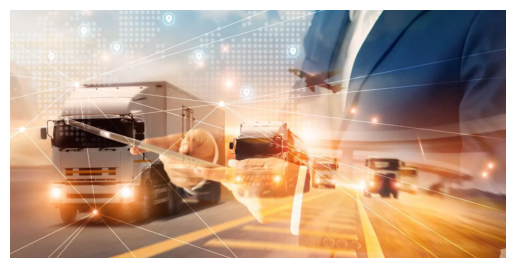

In [3]:
imagen= mpimg.imread('Transport.jpg')
plt.imshow(imagen)
plt.axis('off')
  
plt.show()

In [4]:
#Import DataBases

IRL= pd.read_csv("Plublic Transport Ireland.csv")
IRLuas= pd.read_csv("TOA11 - Luas Passenger Numbers Ireland.csv")
IRLFM=pd.read_csv("Trail Trafict Ireland.csv")
IRF=pd.read_csv("Ireland Ferry.csv")

#Additional Countries
NRWW = pd.read_excel("NORWAY.xlsx")
NZL= pd.read_csv("PT005 - Public transport boardings by mode New Zealand.csv")

#Population
PI=pd.read_csv("PP Ireland.csv")
PN=pd.read_excel("PP Norway.xlsx")
PNZ=pd.read_excel("PP NZ.xlsx")

# Structure of dataframe

In [5]:
#First Database
IRL.head()

STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3  THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   

                      Mode of Transport    UNIT      VALUE  
0                      Dublin Metro Bus  Number  1987891.0  
1           Bus, excluding Dublin Metro  Number   497598.0  
2                                  Rail  Number        NaN  
3  All public transport, excluding LUAS  Number  2485489.0  
4                      Dublin Metro Bus  Number  2709579.0

In [6]:
IRL.info

<bound method DataFrame.info of      STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
...        ...                 ...       ...           ...           ...   
1019  THA25C01  Passenger Journeys   2023W43  2023 Week 43            40   
1020  THA25C01  Passenger Journeys   2023W44  2023 Week 44            10   
1021  THA25C01  Passenger Journeys   2023W44  2023 Week 44            20   
1022  THA25C01  Passenger Journeys   2023W44  2023 Week 44            30   
1023  THA25C01  Passenger Journeys   2023W44  2023 Week 44            40   

                         Mode of Transport    UNIT     

In [7]:
IRL.describe()

C03935V04687         VALUE
count   1024.000000  9.600000e+02
mean      25.000000  1.740812e+06
std       11.185803  1.423490e+06
min       10.000000  2.323100e+04
25%       17.500000  6.121042e+05
50%       25.000000  9.495040e+05
75%       32.500000  2.982254e+06
max       40.000000  5.488658e+06

In [8]:
IRL.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

#  Checking for Missing Values and Inputing Them

In [9]:
IRL.isnull()

STATISTIC  Statistic Label  TLIST(W1)   Week  C03935V04687  \
0         False            False      False  False         False   
1         False            False      False  False         False   
2         False            False      False  False         False   
3         False            False      False  False         False   
4         False            False      False  False         False   
...         ...              ...        ...    ...           ...   
1019      False            False      False  False         False   
1020      False            False      False  False         False   
1021      False            False      False  False         False   
1022      False            False      False  False         False   
1023      False            False      False  False         False   

      Mode of Transport   UNIT  VALUE  
0                 False  False  False  
1                 False  False  False  
2                 False  False   True  
3                 False  False  False  
4                 False  False  False  
...                 ...    ...    ...  
1019              False  False  False  
1020              False  False  False  
1021              False  False  False  
1022              False  False  False  
1023              False  False  False  

[1024 rows x 8 columns]

In [10]:
IRL.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [11]:
IRL.fillna(0, inplace=True)
IRL.isnull()

STATISTIC  Statistic Label  TLIST(W1)   Week  C03935V04687  \
0         False            False      False  False         False   
1         False            False      False  False         False   
2         False            False      False  False         False   
3         False            False      False  False         False   
4         False            False      False  False         False   
...         ...              ...        ...    ...           ...   
1019      False            False      False  False         False   
1020      False            False      False  False         False   
1021      False            False      False  False         False   
1022      False            False      False  False         False   
1023      False            False      False  False         False   

      Mode of Transport   UNIT  VALUE  
0                 False  False  False  
1                 False  False  False  
2                 False  False  False  
3                 False  False  False  
4                 False  False  False  
...                 ...    ...    ...  
1019              False  False  False  
1020              False  False  False  
1021              False  False  False  
1022              False  False  False  
1023              False  False  False  

[1024 rows x 8 columns]

In [12]:
IRL.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

In [13]:
print(IRL['Mode of Transport'].head())

0                        Dublin Metro Bus
1             Bus, excluding Dublin Metro
2                                    Rail
3    All public transport, excluding LUAS
4                        Dublin Metro Bus
Name: Mode of Transport, dtype: object


In [14]:
IRL.head()

STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3  THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   

                      Mode of Transport    UNIT      VALUE  
0                      Dublin Metro Bus  Number  1987891.0  
1           Bus, excluding Dublin Metro  Number   497598.0  
2                                  Rail  Number        0.0  
3  All public transport, excluding LUAS  Number  2485489.0  
4                      Dublin Metro Bus  Number  2709579.0

In [15]:
IRL= IRL[IRL['Mode of Transport'] != 'All public transport, excluding LUAS']
IRL.head()

STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
5  THA25C01  Passenger Journeys   2019W02  2019 Week 02            20   

             Mode of Transport    UNIT      VALUE  
0             Dublin Metro Bus  Number  1987891.0  
1  Bus, excluding Dublin Metro  Number   497598.0  
2                         Rail  Number        0.0  
4             Dublin Metro Bus  Number  2709579.0  
5  Bus, excluding Dublin Metro  Number   633764.0

In [16]:
print(IRL['Mode of Transport'].head())

0               Dublin Metro Bus
1    Bus, excluding Dublin Metro
2                           Rail
4               Dublin Metro Bus
5    Bus, excluding Dublin Metro
Name: Mode of Transport, dtype: object


# Group by Year

In [17]:
IRL['Year'] = IRL['Week'].str.slice(0, 4)  # to get the first 4 characters (year)
IRL['Week_Number'] = IRL['Week'].str.slice(-2)  # Last 2 characters (week number)
IRL['Week_Number'] = IRL['Week_Number'].astype(int)  # Convert to integer type
IRL.head()

STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1  THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2  THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
4  THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
5  THA25C01  Passenger Journeys   2019W02  2019 Week 02            20   

             Mode of Transport    UNIT      VALUE  Year  Week_Number  
0             Dublin Metro Bus  Number  1987891.0  2019            1  
1  Bus, excluding Dublin Metro  Number   497598.0  2019            1  
2                         Rail  Number        0.0  2019            1  
4             Dublin Metro Bus  Number  2709579.0  2019            2  
5  Bus, excluding Dublin Metro  Number   633764.0  2019            2

In [18]:
IRL['Week'] = IRL['Year'].astype(str) + ' ' + IRL['Week_Number'].astype(str)
IRL['Date'] = pd.to_datetime(IRL['Week'] + ' 0', format='%Y %U %w')
IRL['Month'] = IRL['Date'].dt.month.apply(lambda x: calendar.month_name[x])
IRL.head()

STATISTIC     Statistic Label TLIST(W1)    Week  C03935V04687  \
0  THA25C01  Passenger Journeys   2019W01  2019 1            10   
1  THA25C01  Passenger Journeys   2019W01  2019 1            20   
2  THA25C01  Passenger Journeys   2019W01  2019 1            30   
4  THA25C01  Passenger Journeys   2019W02  2019 2            10   
5  THA25C01  Passenger Journeys   2019W02  2019 2            20   

             Mode of Transport    UNIT      VALUE  Year  Week_Number  \
0             Dublin Metro Bus  Number  1987891.0  2019            1   
1  Bus, excluding Dublin Metro  Number   497598.0  2019            1   
2                         Rail  Number        0.0  2019            1   
4             Dublin Metro Bus  Number  2709579.0  2019            2   
5  Bus, excluding Dublin Metro  Number   633764.0  2019            2   

        Date    Month  
0 2019-01-06  January  
1 2019-01-06  January  
2 2019-01-06  January  
4 2019-01-13  January  
5 2019-01-13  January

In [19]:
IRL_Total = IRL.groupby(['Year','Mode of Transport', 'Month']).agg({'VALUE': 'sum'}).reset_index()
IRL_Total.head()

Year            Mode of Transport     Month      VALUE
0  2019  Bus, excluding Dublin Metro     April  2681041.0
1  2019  Bus, excluding Dublin Metro    August  2684969.0
2  2019  Bus, excluding Dublin Metro  December  3633236.0
3  2019  Bus, excluding Dublin Metro  February  2783538.0
4  2019  Bus, excluding Dublin Metro   January  2485599.0

# Second database 

In [20]:
IRLuas.head()

STATISTIC Statistic Label  TLIST(A1)  Year C01885V02316     Month    UNIT  \
0  TOA11C01        Red line       2018  2018            1   January  Number   
1  TOA11C01        Red line       2018  2018            2  February  Number   
2  TOA11C01        Red line       2018  2018            3     March  Number   
3  TOA11C01        Red line       2018  2018            4     April  Number   
4  TOA11C01        Red line       2018  2018            5       May  Number   

     VALUE  
0  1664495  
1  1657562  
2  1661098  
3  1794424  
4  1934553

In [21]:
print(IRLuas['Statistic Label'].head())

0    Red line
1    Red line
2    Red line
3    Red line
4    Red line
Name: Statistic Label, dtype: object


In [22]:
IRL_2 = IRLuas[['Statistic Label','Year','Month','VALUE']]

In [23]:
IRL_2=IRL_2[IRL_2["Year"].astype("int64")>=2019]
IRL_2.head()

Statistic Label  Year     Month    VALUE
13        Red line  2019   January  1747263
14        Red line  2019  February  1846358
15        Red line  2019     March  2052087
16        Red line  2019     April  1916485
17        Red line  2019       May  1992879

In [24]:
IRL_T= IRL_2[IRL_2['Statistic Label'] == 'All Luas lines']

In [25]:
IRL_T= IRL_T[IRL_T['Month'] != 'All months']

In [26]:
IRL_T=IRL_T.rename (columns= {'Statistic Label':'Mode of Transport'})
IRL_T.head()

Mode of Transport  Year     Month    VALUE
143    All Luas lines  2019   January  3658484
144    All Luas lines  2019  February  3727609
145    All Luas lines  2019     March  4069124
146    All Luas lines  2019     April  3826763
147    All Luas lines  2019       May  4003472

# Concatenate 2 dataframes

In [27]:
Ireland = pd.concat([IRL_Total, IRL_T], ignore_index=True)
Ireland

Year            Mode of Transport      Month      VALUE
0    2019  Bus, excluding Dublin Metro      April  2681041.0
1    2019  Bus, excluding Dublin Metro     August  2684969.0
2    2019  Bus, excluding Dublin Metro   December  3633236.0
3    2019  Bus, excluding Dublin Metro   February  2783538.0
4    2019  Bus, excluding Dublin Metro    January  2485599.0
..    ...                          ...        ...        ...
217  2022               All Luas lines     August  3292231.0
218  2022               All Luas lines  September  3811093.0
219  2022               All Luas lines    October  4219124.0
220  2022               All Luas lines   November  4375705.0
221  2022               All Luas lines   December  4030698.0

[222 rows x 4 columns]

In [28]:
Ireland.isnull()

Year  Mode of Transport  Month  VALUE
0    False              False  False  False
1    False              False  False  False
2    False              False  False  False
3    False              False  False  False
4    False              False  False  False
..     ...                ...    ...    ...
217  False              False  False  False
218  False              False  False  False
219  False              False  False  False
220  False              False  False  False
221  False              False  False  False

[222 rows x 4 columns]

In [29]:
Ireland.isnull().sum()

Year                 0
Mode of Transport    0
Month                0
VALUE                0
dtype: int64

In [30]:
Transport_M = Ireland['Mode of Transport'].value_counts()
Transport_M

Bus, excluding Dublin Metro    58
Dublin Metro Bus               58
Rail                           58
All Luas lines                 48
Name: Mode of Transport, dtype: int64

In [31]:
mapping = {
    'All Luas lines': 'Luas',
    'Bus, excluding Dublin Metro':'Bus',
    'Dublin Metro Bus': 'Metro Bus',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [32]:
Ireland

Year Mode of Transport      Month      VALUE
0    2019               Bus      April  2681041.0
1    2019               Bus     August  2684969.0
2    2019               Bus   December  3633236.0
3    2019               Bus   February  2783538.0
4    2019               Bus    January  2485599.0
..    ...               ...        ...        ...
217  2022              Luas     August  3292231.0
218  2022              Luas  September  3811093.0
219  2022              Luas    October  4219124.0
220  2022              Luas   November  4375705.0
221  2022              Luas   December  4030698.0

[222 rows x 4 columns]

In [33]:
def Quarter(month):
    if month in ['January', 'February', 'March']:
        return 'K1'
    elif month in ['April','May', 'June']:
        return 'K2'
    elif month in ['July', 'August','September']:
        return 'K3'
    elif month in ['October', 'November', 'December']:
        return 'K4'
Ireland['Quarter'] = Ireland['Month'].apply(Quarter)
Ireland

Year Mode of Transport      Month      VALUE Quarter
0    2019               Bus      April  2681041.0      K2
1    2019               Bus     August  2684969.0      K3
2    2019               Bus   December  3633236.0      K4
3    2019               Bus   February  2783538.0      K1
4    2019               Bus    January  2485599.0      K1
..    ...               ...        ...        ...     ...
217  2022              Luas     August  3292231.0      K3
218  2022              Luas  September  3811093.0      K3
219  2022              Luas    October  4219124.0      K4
220  2022              Luas   November  4375705.0      K4
221  2022              Luas   December  4030698.0      K4

[222 rows x 5 columns]

In [34]:
Ireland = Ireland.groupby(['Year', 'Mode of Transport', 'Quarter'])['VALUE'].sum().reset_index()

In [35]:
Ireland['VALUE'] = (Ireland['VALUE'] / 1000).round(2)
Ireland

Year Mode of Transport Quarter     VALUE
0   2019              Luas      K1  11455.22
1   2019              Luas      K2  11580.96
2   2019              Luas      K3  12078.81
3   2019              Luas      K4  13232.25
4   2020              Luas      K1   9520.41
..   ...               ...     ...       ...
71  2023         Metro Bus      K4  17265.58
72  2023              Rail      K1  10114.46
73  2023              Rail      K2  11277.19
74  2023              Rail      K3  11102.10
75  2023              Rail      K4   4525.98

[76 rows x 4 columns]

In [36]:
Ireland['Year'] = Ireland['Year'].astype(int)
Ireland['VALUE'] = Ireland['VALUE'].astype(int)

# Z TEST

In [37]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [38]:
# Reviewing in which quarter of the 5 years of analysis each type of transport is most used 

In [39]:
Ztest= Ireland.copy()

In [40]:
Ztest.head()

Year Mode of Transport Quarter  VALUE
0  2019              Luas      K1  11455
1  2019              Luas      K2  11580
2  2019              Luas      K3  12078
3  2019              Luas      K4  13232
4  2020              Luas      K1   9520

In [41]:
import itertools
import statsmodels.stats.weightstats as ws

In [42]:
# Quarter and mode of transport
summary_stats = Ztest.groupby(['Quarter', 'Mode of Transport'])['VALUE'].mean().unstack()

# Performing pairwise comparisons of quarters using Z-test
quarters = Ztest['Quarter'].unique()
transport_modes = Ztest['Mode of Transport'].unique()

In [43]:
results = {}

# Iterate over all pairs of quarters and conduct Z-tests for each mode of transport
for pair in itertools.combinations(quarters, 2):
    quarter_1 = pair[0]
    quarter_2 = pair[1]
    results[pair] = {}
    for transport in transport_modes:
        values_quarter_1 = Ztest[(Ztest['Quarter'] == quarter_1) & (Ztest['Mode of Transport'] == transport)]['VALUE']
        values_quarter_2 = Ztest[(Ztest['Quarter'] == quarter_2) & (Ztest['Mode of Transport'] == transport)]['VALUE']
        
        # Perform Z-test using statsmodels
        z_score, p_value = ws.ztest(values_quarter_1, values_quarter_2)
        results[pair][transport] = {'Z': z_score, 'p_value': p_value}

In [44]:
# Finding the quarter with the highest values using Z-test results
highest_quarter = {}
for pair, transport_data in results.items():
    for transport, data in transport_data.items():
        if transport not in highest_quarter or data['p_value'] < highest_quarter[transport]['p_value']:
            highest_quarter[transport] = {'quarters': pair, 'p_value': data['p_value'], 'Z': data['Z']}

print("Quarters with the highest values for each mode of transport:")
for transport, data in highest_quarter.items():
    print(f"Transport Mode: {transport}, Quarters: {data['quarters']}, p-value: {data['p_value']}, Z-value: {data['Z']}")

Quarters with the highest values for each mode of transport:
Transport Mode: Luas, Quarters: ('K2', 'K4'), p-value: 0.37394096122454856, Z-value: -0.8891155898751496
Transport Mode: Bus, Quarters: ('K2', 'K3'), p-value: 0.49743115985031183, Z-value: -0.6785371775160102
Transport Mode: Metro Bus, Quarters: ('K2', 'K3'), p-value: 0.5905860119969577, Z-value: -0.537987016750394
Transport Mode: Rail, Quarters: ('K3', 'K4'), p-value: 0.5999085851775864, Z-value: 0.524531976492478


Luas: The quarters ('K2', 'K4') have a p-value of approximately 0.37 and a Z-value of around -0.89. A high p-value suggests that there is not enough evidence to reject the null hypothesis. The negative Z-value indicates that the difference between the values of these quarters for the Luas mode of transportation is not significant.

Bus: Quarters ('K2', 'K3') have a p-value of around 0.50 and a Z-value of approximately -0.68. Similarly, the high p-value suggests that there is not enough evidence to reject the null hypothesis. The negative Z-value indicates that the difference between the values of these quarters for the Bus mode of transportation is not significant.

Metro Bus: Similar to Bus, the quarters ('K2', 'K3') have a high p-value, around 0.59, and a negative Z-value of approximately -0.54. This indicates that there is not enough evidence to reject the null hypothesis, and the difference between the values of these quarters for the Metro Bus mode of transportation is not significant.

Rail: Quarters ('K3', 'K4') have a p-value of approximately 0.60 and a positive Z-value close to 0.52. Similar to the above cases, a high p-value suggests that there is not enough evidence to reject the null hypothesis. The positive Z-value indicates a difference, but not a significant one, between the values of these quarters for the Rail mode of transportation.

In summary, for all the mentioned modes of transportation, the high p-values suggest that there is not enough evidence to claim a significant difference between the values of the compared quarters. The Z-values close to zero or with small absolute values also support this conclusion, indicating a lack of substantial differences between the analyzed periods for each mode of transportation.

# Evolution of transport use in Ireland 

In [45]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [46]:
fig = px.bar(Ireland, x='Year', y='VALUE', color='Mode of Transport', 
             animation_frame='Quarter', 
             title='Evolution of transport use in Ireland')

fig.show()

In [47]:
#Passenger Shipping in Ireland 
IRF.head()

C01855V02284      Irish Ports  TLIST(A1)  Year STATISTIC  \
0           IE  All Irish ports       2006  2006  TBA10C02   
1           IE  All Irish ports       2007  2007  TBA10C02   
2           IE  All Irish ports       2008  2008  TBA10C02   
3           IE  All Irish ports       2009  2009  TBA10C02   
4           IE  All Irish ports       2010  2010  TBA10C02   

                   Statistic Label    UNIT     VALUE  
0  Passenger Visits to Irish Ports  Number  105748.0  
1  Passenger Visits to Irish Ports  Number  105725.0  
2  Passenger Visits to Irish Ports  Number  145845.0  
3  Passenger Visits to Irish Ports  Number  159466.0  
4  Passenger Visits to Irish Ports  Number  176762.0

In [48]:
IRFF = IRF[IRF['Year'] >= 2019][['Year', 'VALUE']]
IRFF.head()

Year     VALUE
13  2019  432443.0
14  2022  250116.0
28  2019    5429.0
29  2022    4563.0
43  2019       0.0

In [49]:
IRFF = IRFF.groupby('Year')['VALUE'].sum()
IRFF

Year
2019    864886.0
2022    500232.0
Name: VALUE, dtype: float64

In [50]:
IRFF = pd.DataFrame({'Year': [2019, 2022], 'VALUE': [864886.0, 500232.0]})


missing_years = [2020, 2021, 2023]
for year in missing_years:
    IRFF = IRFF.append({'Year': year, 'VALUE': float('nan')}, ignore_index=True)

IRFF

Year     VALUE
0  2019.0  864886.0
1  2022.0  500232.0
2  2020.0       NaN
3  2021.0       NaN
4  2023.0       NaN

In [51]:
IRFF = IRFF.sort_values('Year')
IRFF

Year     VALUE
0  2019.0  864886.0
2  2020.0       NaN
3  2021.0       NaN
1  2022.0  500232.0
4  2023.0       NaN

In [52]:
IRFF['VALUE'] = IRFF['VALUE'].fillna(method='ffill')
IRFF

Year     VALUE
0  2019.0  864886.0
2  2020.0  864886.0
3  2021.0  864886.0
1  2022.0  500232.0
4  2023.0  500232.0

In [53]:
IRFF['Mode of Transport'] = 'Maritime transportation'
IRFF['VALUE'] = IRFF['VALUE'] / 1000

In [54]:
IRFF

Year    VALUE        Mode of Transport
0  2019.0  864.886  Maritime transportation
2  2020.0  864.886  Maritime transportation
3  2021.0  864.886  Maritime transportation
1  2022.0  500.232  Maritime transportation
4  2023.0  500.232  Maritime transportation

In [55]:
Ireland2 = pd.concat([Ireland, IRFF], ignore_index=True)
Ireland2.head()

Year Mode of Transport Quarter    VALUE
0  2019.0              Luas      K1  11455.0
1  2019.0              Luas      K2  11580.0
2  2019.0              Luas      K3  12078.0
3  2019.0              Luas      K4  13232.0
4  2020.0              Luas      K1   9520.0

In [56]:
Ireland2.drop('Quarter', axis=1, inplace=True)
Ireland2['Country'] = 'Ireland'
Ireland3= Ireland2.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()
Ireland3.head()

Year  Country        Mode of Transport       VALUE
0  2019.0  Ireland                      Bus   36900.000
1  2019.0  Ireland                     Luas   48345.000
2  2019.0  Ireland  Maritime transportation     864.886
3  2019.0  Ireland                Metro Bus  151654.000
4  2019.0  Ireland                     Rail       0.000

# Transports used in Ireland from 2019 to 2023 (First country)

Text(0, 0.5, 'Value in thousands')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2019.0'),
  Text(1, 0, '2020.0'),
  Text(2, 0, '2021.0'),
  Text(3, 0, '2022.0'),
  Text(4, 0, '2023.0')])

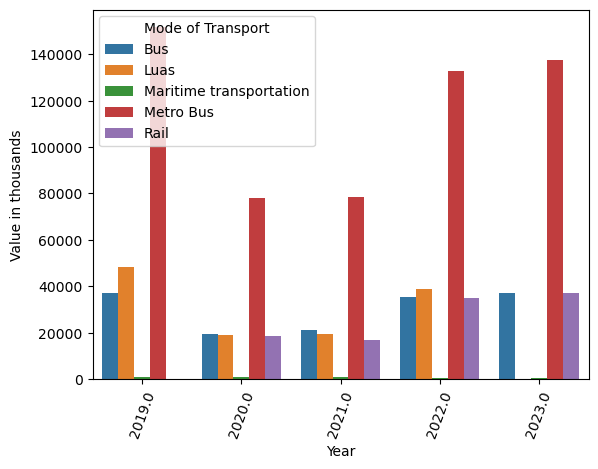

In [57]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Ireland3)

plt.ylabel('Value in thousands')

plt.xticks(rotation=70)

In [58]:
Ireland3= Ireland3[Ireland3['Mode of Transport'] == 'Maritime transportation']

# Data set for better integration with data from the 2 additional countries 

In [59]:
Ireland['Country'] = 'Ireland'

In [60]:
mapping = {
    'Luas': 'Tram and suburban railway',
    'Metro Bus':'Bus',
    'Rail': 'Tram and suburban railway',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [61]:
Ireland.head()

Year          Mode of Transport Quarter  VALUE  Country
0  2019  Tram and suburban railway      K1  11455  Ireland
1  2019  Tram and suburban railway      K2  11580  Ireland
2  2019  Tram and suburban railway      K3  12078  Ireland
3  2019  Tram and suburban railway      K4  13232  Ireland
4  2020  Tram and suburban railway      K1   9520  Ireland

# Second country: Norway 

In [62]:
NRWW.head()

Contents               Mode of Transport  \
0  Passengers (1 000 passengers)     All modes of transportation   
1  Passengers (1 000 passengers)     All modes of transportation   
2  Passengers (1 000 passengers)     All modes of transportation   
3  Passengers (1 000 passengers)  Bus (Scheduled road transport)   
4  Passengers (1 000 passengers)  Bus (Scheduled road transport)   

          Type of route  2019K1  2019K2  2019K3  2019K4  2020K1 2020K2  \
0                 Total  185208  166243  154021  189817  147832  78412   
1      Commercial routs       .       .       .       .       .      .   
2  Public-funded routes       .       .       .       .       .      .   
3                 Total  111127   97337   89841  115613   91551  49575   
4      Commercial routs    2161    2140    2314    2152    2084    352   

   2020K3  ...  2021K2  2021K3  2021K4  2022K1  2022K2  2022K3  2022K4  \
0  104742  ...  105964  119821  147908  143175  156600  149507  176612   
1       .  ...       .       .       .       .       .       .       .   
2       .  ...       .       .       .       .       .       .       .   
3   65728  ...   71174   75073   93229   91748   96026   90117  109149   
4    1096  ...     368     942    1076     962    1432    1730    1347   

   2023K1  2023K2  2023K3  
0  187085  173702  162879  
1       .       .       .  
2       .       .       .  
3  117465  106997   98617  
4    1090    1400    1457  

[5 rows x 22 columns]

In [63]:
NRWW= NRWW[NRWW['Type of route'] == 'Public-funded routes']
NRWW.head()

Contents               Mode of Transport  \
2   Passengers (1 000 passengers)     All modes of transportation   
5   Passengers (1 000 passengers)  Bus (Scheduled road transport)   
8   Passengers (1 000 passengers)                            Boat   
11  Passengers (1 000 passengers)       Tram and suburban railway   
14  Passengers (1 000 passengers)                         Railway   

           Type of route  2019K1 2019K2 2019K3  2019K4 2020K1 2020K2 2020K3  \
2   Public-funded routes       .      .      .       .      .      .      .   
5   Public-funded routes  108967  95197  87527  113461  89467  49224  64632   
8   Public-funded routes    1990   2528   2730    2124   1570   1235   1852   
11  Public-funded routes   50904  45116  42323   50136  36986  20261  27133   
14  Public-funded routes       .      .      .       .      .      .      .   

    ... 2021K2 2021K3 2021K4 2022K1 2022K2 2022K3  2022K4  2023K1  2023K2  \
2   ...      .      .      .      .      .      .       .       .       .   
5   ...  70805  74131  92153  90786  94594  88387  107801  116375  105597   
8   ...   1447   2089   1518   1376   2182   2524    2106    1752    2430   
11  ...  24163  31072  38044  36067  40642  39584   45952   48231   44102   
14  ...      .      .      .      .      .      .       .       .       .   

   2023K3  
2       .  
5   97161  
8    2398  
11  42549  
14      .  

[5 rows x 22 columns]

In [64]:
NRWW.drop(['Contents', 'Type of route'], axis=1, inplace=True)

In [65]:
NRWW_1=NRWW.drop([2, 14])

In [66]:
NRWW_1.head()

Mode of Transport  2019K1 2019K2 2019K3  2019K4 2020K1  \
5   Bus (Scheduled road transport)  108967  95197  87527  113461  89467   
8                             Boat    1990   2528   2730    2124   1570   
11       Tram and suburban railway   50904  45116  42323   50136  36986   

   2020K2 2020K3 2020K4 2021K1 2021K2 2021K3 2021K4 2022K1 2022K2 2022K3  \
5   49224  64632  71002  67629  70805  74131  92153  90786  94594  88387   
8    1235   1852   1183    974   1447   2089   1518   1376   2182   2524   
11  20261  27133  25401  21677  24163  31072  38044  36067  40642  39584   

    2022K4  2023K1  2023K2 2023K3  
5   107801  116375  105597  97161  
8     2106    1752    2430   2398  
11   45952   48231   44102  42549

In [67]:
mapping = {
    'Bus (Scheduled road transport)': 'Bus',
    'Boat':'Maritime transportation '}

NRWW_1['Mode of Transport'] = NRWW_1['Mode of Transport'].replace(mapping)

In [68]:
NRWW_1.head()

Mode of Transport  2019K1 2019K2 2019K3  2019K4 2020K1 2020K2  \
5                         Bus  108967  95197  87527  113461  89467  49224   
8    Maritime transportation     1990   2528   2730    2124   1570   1235   
11  Tram and suburban railway   50904  45116  42323   50136  36986  20261   

   2020K3 2020K4 2021K1 2021K2 2021K3 2021K4 2022K1 2022K2 2022K3  2022K4  \
5   64632  71002  67629  70805  74131  92153  90786  94594  88387  107801   
8    1852   1183    974   1447   2089   1518   1376   2182   2524    2106   
11  27133  25401  21677  24163  31072  38044  36067  40642  39584   45952   

    2023K1  2023K2 2023K3  
5   116375  105597  97161  
8     1752    2430   2398  
11   48231   44102  42549

In [69]:
NRWW_3= NRWW_1.melt(var_name="Year",value_name="VALUE")
NRWW_3.head()

Year                      VALUE
0  Mode of Transport                        Bus
1  Mode of Transport   Maritime transportation 
2  Mode of Transport  Tram and suburban railway
3             2019K1                     108967
4             2019K1                       1990

In [70]:
sequence = ['Bus', 'Maritime transportation', 'Tram and suburban railway']
seq_length = len(sequence)

NRWW_3['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NRWW_3))]

NRWW_3.head()

Year                      VALUE          Mode of Transport
0  Mode of Transport                        Bus                        Bus
1  Mode of Transport   Maritime transportation     Maritime transportation
2  Mode of Transport  Tram and suburban railway  Tram and suburban railway
3             2019K1                     108967                        Bus
4             2019K1                       1990    Maritime transportation

In [71]:
NRWW_3 = NRWW_3.drop([0, 1, 2])

In [72]:
NRWW_3[['Year', 'Quarter']] = NRWW_3['Year'].str.extract(r'(\d{4})(K\d)')
NRWW_3.head()

Year   VALUE          Mode of Transport Quarter
3  2019  108967                        Bus      K1
4  2019    1990    Maritime transportation      K1
5  2019   50904  Tram and suburban railway      K1
6  2019   95197                        Bus      K2
7  2019    2528    Maritime transportation      K2

In [73]:
NRWW_3['Country'] = 'Norway'

Concatenate the two data frames of the two countries, Ireland and Norway with data for the last 5 years per quarter. 

In [74]:
Transport = pd.concat([Ireland, NRWW_3], ignore_index=True)
Transport

Year          Mode of Transport Quarter  VALUE  Country
0    2019  Tram and suburban railway      K1  11455  Ireland
1    2019  Tram and suburban railway      K2  11580  Ireland
2    2019  Tram and suburban railway      K3  12078  Ireland
3    2019  Tram and suburban railway      K4  13232  Ireland
4    2020  Tram and suburban railway      K1   9520  Ireland
..    ...                        ...     ...    ...      ...
128  2023    Maritime transportation      K2   2430   Norway
129  2023  Tram and suburban railway      K2  44102   Norway
130  2023                        Bus      K3  97161   Norway
131  2023    Maritime transportation      K3   2398   Norway
132  2023  Tram and suburban railway      K3  42549   Norway

[133 rows x 5 columns]

# Evolution of transport use Ireland and Norway since 2019

In [75]:
fig = px.bar(Transport, x='Year', y='VALUE', color='Mode of Transport',
             animation_frame='Quarter', facet_col='Country',
             title='Transport: Ireland & Norway')

fig.show()

# Data set per year 

In [76]:
Transport_Year = Transport.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()

In [77]:
Transport_Year= pd.concat([Transport_Year, Ireland3], ignore_index=True)
Transport_Year.head()

Year  Country          Mode of Transport   VALUE
0  2019  Ireland                        Bus  188554
1  2019  Ireland  Tram and suburban railway   48345
2  2020  Ireland                        Bus   97520
3  2020  Ireland  Tram and suburban railway   37954
4  2021  Ireland                        Bus   99409

<Axes: xlabel='Year,Country'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value in thousands ')

Text(0.5, 1.0, 'Transportation per Year: Ireland & Norway')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2019, Ireland)'),
  Text(1, 0, '(2020, Ireland)'),
  Text(2, 0, '(2021, Ireland)'),
  Text(3, 0, '(2022, Ireland)'),
  Text(4, 0, '(2023, Ireland)'),
  Text(5, 0, '(2019, Norway)'),
  Text(6, 0, '(2020, Norway)'),
  Text(7, 0, '(2021, Norway)'),
  Text(8, 0, '(2022, Norway)'),
  Text(9, 0, '(2023, Norway)')])

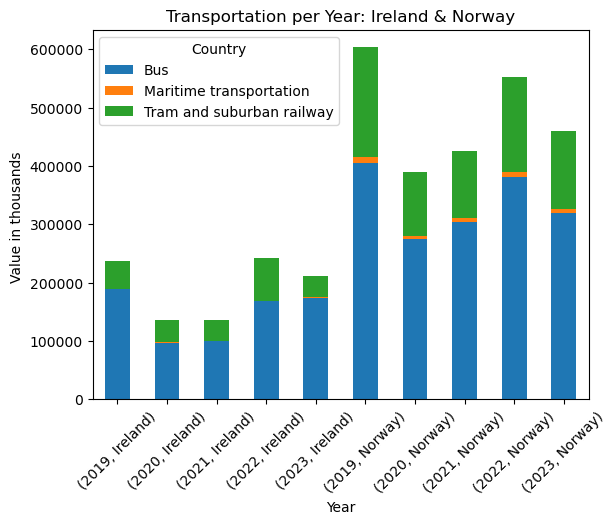

In [78]:
grouped = Transport_Year.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Value in thousands ')
plt.title('Transportation per Year: Ireland & Norway')
plt.legend(title='Country')
plt.xticks(rotation=45)


plt.show()

# Third Country: New Zealand

In [79]:
NZL

Unnamed: 0  2000  2001  2002  2003  2004  2005  2006  2007  2008   2009  \
0        Bus  70.2  77.4  89.1  88.1  87.2  89.3  90.3  93.0  99.1  101.0   
1      Train  12.2  12.4  12.5  13.4  14.3  16.4  16.9  18.4  19.5   19.6   
2      Ferry   3.5   3.8   4.0   4.0   4.1   4.2   4.2   4.7   4.7    4.9   

    2010   2011   2012   2013   2014   2015   2016   2017   2018  
0  100.9  103.7  104.1  108.4  112.3  112.2  113.9  118.3  126.0  
1   21.1   22.2   21.4   23.1   26.1   29.6   32.7   33.7   35.7  
2    5.0    5.7    5.8    5.5    5.9    6.2    6.5    6.4    6.7

In [80]:
NZL_1= NZL.melt(var_name="Year",value_name="VALUE")
NZL_1.head()

Year  VALUE
0  Unnamed: 0    Bus
1  Unnamed: 0  Train
2  Unnamed: 0  Ferry
3        2000   70.2
4        2000   12.2

In [81]:
sequence = ['Bus', 'Tram and suburban railway', 'Maritime transportation']
seq_length = len(sequence)

NZL_1['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NZL_1))]

NZL_1.head()

Year  VALUE          Mode of Transport
0  Unnamed: 0    Bus                        Bus
1  Unnamed: 0  Train  Tram and suburban railway
2  Unnamed: 0  Ferry    Maritime transportation
3        2000   70.2                        Bus
4        2000   12.2  Tram and suburban railway

In [82]:
NZL_1 = NZL_1.drop([0, 1, 2])

In [83]:
NZL_1['VALUE'] = pd.to_numeric(NZL_1['VALUE'], errors='coerce')

In [84]:
NZL_1['VALUE'] = (NZL_1['VALUE'] * 1000).round(2)
NZL_1.head()

Year    VALUE          Mode of Transport
3  2000  70200.0                        Bus
4  2000  12200.0  Tram and suburban railway
5  2000   3500.0    Maritime transportation
6  2001  77400.0                        Bus
7  2001  12400.0  Tram and suburban railway

In [85]:
NZL_1['Year'] = NZL_1['Year'].astype(int)
NZL_1['VALUE'] = NZL_1['VALUE'].astype(float)

# Linear projection for each mode of transport

Due to the lack of current data, a 5-year projection will be made in order to have data up to 2023

In [86]:
newzeland = pd.DataFrame(columns=['Year', 'Mode of Transport', 'VALUE'])

for mode in NZL_1['Mode of Transport'].unique():
    mode_data = NZL_1[NZL_1['Mode of Transport'] == mode]
    x = mode_data['Year'].values.reshape(-1, 1)
    y = mode_data['VALUE'].values.reshape(-1, 1)

#Linear projection for the next 5 years
    next_years = np.arange(NZL_1['Year'].max() + 1, NZL_1['Year'].max() + 6).reshape(-1, 1)
    coef = np.polyfit(x.ravel(), y.ravel(), 1)
    projection = np.polyval(coef, next_years)

#DataFrame
    newzeland = newzeland.append(pd.DataFrame({'Year': next_years.ravel(), 'Mode of Transport': [mode] * 5, 'VALUE': projection.ravel()}), ignore_index=True)

newzeland.head()

Year Mode of Transport          VALUE
0  2019               Bus  123992.982456
1  2020               Bus  126473.859649
2  2021               Bus  128954.736842
3  2022               Bus  131435.614035
4  2023               Bus  133916.491228

In [87]:
newzeland['VALUE'] = newzeland['VALUE'].round(2)

In [88]:
newzeland['Country'] = 'Newzeland'
newzeland.head()

Year Mode of Transport      VALUE    Country
0  2019               Bus  123992.98  Newzeland
1  2020               Bus  126473.86  Newzeland
2  2021               Bus  128954.74  Newzeland
3  2022               Bus  131435.61  Newzeland
4  2023               Bus  133916.49  Newzeland

In [89]:
Transport_1 = pd.concat([Transport_Year, newzeland], ignore_index=True)
Transport_1.head()

Year  Country          Mode of Transport   VALUE
0  2019  Ireland                        Bus  188554
1  2019  Ireland  Tram and suburban railway   48345
2  2020  Ireland                        Bus   97520
3  2020  Ireland  Tram and suburban railway   37954
4  2021  Ireland                        Bus   99409

In [90]:
Transport_1['Year'] = Transport_1['Year'].astype(int)
Transport_1['VALUE'] = Transport_1['VALUE'].astype(float)

# Evolution per year for each mode of transport: Ireland-Norway-New Zealand

In [91]:
fig = px.line(Transport_1, x='Year', y='VALUE', color='Country', facet_col='Mode of Transport',
              title='Evolution per year for each mode of transport')

fig.update_yaxes(title_text='Value in thousands ')

# First analysis

According to the population from 2019 to 2023, it is estimated how many times per person have used each of the transports 

In [92]:
Population = pd.concat([PI,PN, PNZ], ignore_index=True)
Population.head()

Year  Population  Country
0  2019      4958.5  Ireland
1  2020      5029.9  Ireland
2  2021      5074.7  Ireland
3  2022      5184.0  Ireland
4  2023      5281.6  Ireland

In [93]:
merged_Population = pd.merge(Transport_1, Population, on=['Year', 'Country'])
merged_Population.head()

Year  Country          Mode of Transport       VALUE  Population
0  2019  Ireland                        Bus  188554.000      4958.5
1  2019  Ireland  Tram and suburban railway   48345.000      4958.5
2  2019  Ireland    Maritime transportation     864.886      4958.5
3  2020  Ireland                        Bus   97520.000      5029.9
4  2020  Ireland  Tram and suburban railway   37954.000      5029.9

In [94]:
# Statistical information 

In [95]:
P_stats = merged_Population.groupby('Country')['Population'].agg(['mean', 'var', 'median', 'std', 'min', 'max'])
P_stats= pd.DataFrame(P_stats)
P_stats

mean           var    median         std       min       max
Country                                                                    
Ireland    5105.740  14024.179714  5074.700  118.423730  4958.500  5281.600
Newzeland  5137.780   6176.337429  5116.500   78.589678  5040.400  5269.200
Norway     5400.283   3179.012618  5391.369   56.382733  5328.212  5488.984

In [96]:
# Annual growth rate
P_stats['growth_rate'] = P_stats['mean'].pct_change() * 100

In [97]:
population_mean = P_stats['mean']
population_mean

Country
Ireland      5105.740
Newzeland    5137.780
Norway       5400.283
Name: mean, dtype: float64

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Population')

Text(0.5, 1.0, 'Mean Population over Years')

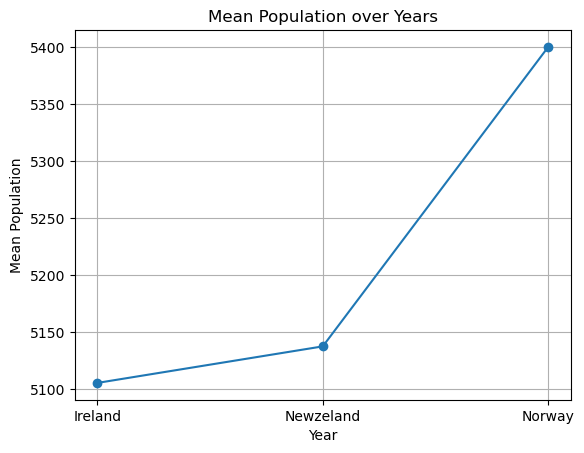

In [98]:
plt.plot(population_mean.index, population_mean.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population over Years')

plt.grid(True)
plt.show()

In [99]:
population_var = P_stats['var']
population_var

Country
Ireland      14024.179714
Newzeland     6176.337429
Norway        3179.012618
Name: var, dtype: float64

<BarContainer object of 3 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Var Population')

Text(0.5, 1.0, 'Var Population over Years')

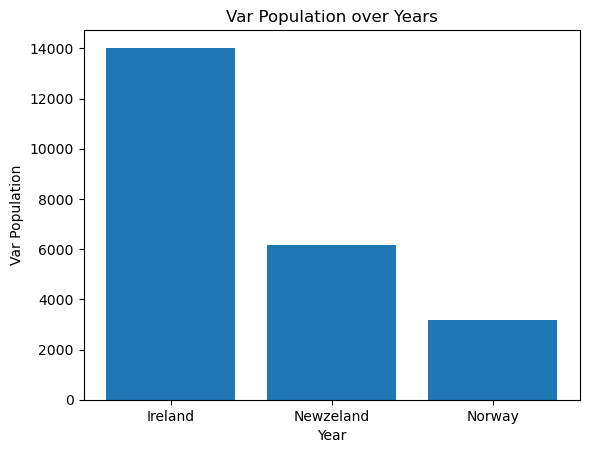

In [100]:
Country = ['Ireland', 'Newzeland', 'Norway']
VALUE = [14024.17, 6176.33, 3179.01]

plt.bar(Country, VALUE)

plt.xlabel('Year')
plt.ylabel('Var Population')
plt.title('Var Population over Years')

# Mostrar la gráfica
plt.show()

In [101]:
population_growth_rate = P_stats['growth_rate']
population_growth_rate

Country
Ireland           NaN
Newzeland    0.627529
Norway       5.109269
Name: growth_rate, dtype: float64

In [102]:
population_growth_rate = pd.DataFrame(population_growth_rate)

In [103]:
P_stats

mean           var    median         std       min       max  \
Country                                                                       
Ireland    5105.740  14024.179714  5074.700  118.423730  4958.500  5281.600   
Newzeland  5137.780   6176.337429  5116.500   78.589678  5040.400  5269.200   
Norway     5400.283   3179.012618  5391.369   56.382733  5328.212  5488.984   

           growth_rate  
Country                 
Ireland            NaN  
Newzeland     0.627529  
Norway        5.109269

In the case of Ireland I get the first NA value because it does not have a previous year to compare it with

In [104]:
ireland_data = merged_Population[merged_Population['Country'] == 'Ireland']

ireland_first_year = ireland_data[ireland_data['Year'] > ireland_data['Year'].min()]

initial_population = ireland_data[ireland_data['Year'] == ireland_data['Year'].min()]['Population'].iloc[0]
final_population = ireland_first_year['Population'].iloc[-1]
growth_rate_general = ((final_population - initial_population) / initial_population) * 100

print("Ireland Growth rate:", growth_rate_general)

Ireland Growth rate: 6.516083492991839


In [105]:
P_stats.loc['Ireland', 'growth_rate'] = 6.516083
P_stats

mean           var    median         std       min       max  \
Country                                                                       
Ireland    5105.740  14024.179714  5074.700  118.423730  4958.500  5281.600   
Newzeland  5137.780   6176.337429  5116.500   78.589678  5040.400  5269.200   
Norway     5400.283   3179.012618  5391.369   56.382733  5328.212  5488.984   

           growth_rate  
Country                 
Ireland       6.516083  
Newzeland     0.627529  
Norway        5.109269

<Axes: xlabel='Country'>

Text(0.5, 1.0, 'Growth rate')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Growth rate')

(array([0, 1, 2]),
 [Text(0, 0, 'Ireland'), Text(1, 0, 'Newzeland'), Text(2, 0, 'Norway')])

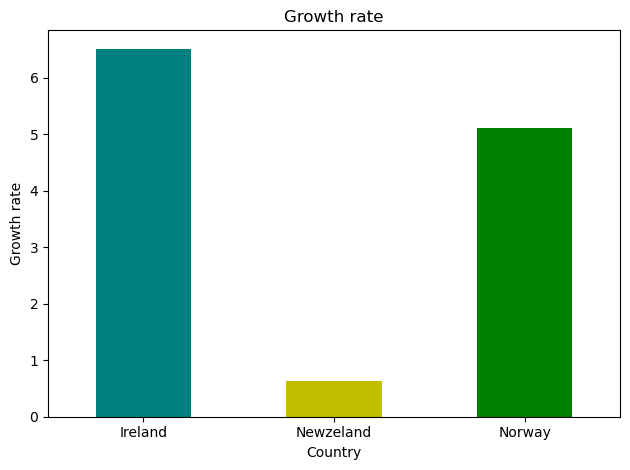

In [106]:
P_stats['growth_rate'].plot(kind='bar', color=['teal', 'y', 'green'])
plt.title('Growth rate')
plt.xlabel('Country')
plt.ylabel('Growth rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In total for the 5 years being evaluated, Ireland is the country that has grown the most with 6.5% per year, in second place Norway with 5.1% per year and in third place New Zealand with 0.6% per year.

# Frequency of Use

In [107]:
merged_Population['Frequency_of_Use'] = merged_Population['VALUE'] / merged_Population['Population'] 
merged_Population.head()

Year  Country          Mode of Transport       VALUE  Population  \
0  2019  Ireland                        Bus  188554.000      4958.5   
1  2019  Ireland  Tram and suburban railway   48345.000      4958.5   
2  2019  Ireland    Maritime transportation     864.886      4958.5   
3  2020  Ireland                        Bus   97520.000      5029.9   
4  2020  Ireland  Tram and suburban railway   37954.000      5029.9   

   Frequency_of_Use  
0         38.026419  
1          9.749924  
2          0.174425  
3         19.388059  
4          7.545677

In [108]:
MP= merged_Population

In [109]:
#Future population using the statistical data 

In [110]:
growth_rates = P_stats['growth_rate']


future_years = range(2024, 2029)

future_population = pd.DataFrame(columns=['Year', 'Country', 'Population'])

for country in merged_Population['Country'].unique():
    population = merged_Population[merged_Population['Country'] == country]['Population'].iloc[-1]
    growth_rate = growth_rates.loc[country]
    
    population_predictions = []
    for year in future_years:
        population = population * (1 + (growth_rate / 100))**(year - merged_Population['Year'].max())
        population_predictions.append([year, country, population])
    
    df_predictions = pd.DataFrame(population_predictions, columns=['Year', 'Country', 'Population'])
    future_population = pd.concat([future_population, df_predictions])

future_population.head()

Year  Country    Population
0  2024  Ireland   5625.753440
1  2025  Ireland   6382.797543
2  2026  Ireland   7713.591426
3  2027  Ireland   9929.271388
4  2028  Ireland  13614.237359

In [111]:
merged_population_future = pd.merge(merged_Population, future_population, on=['Year', 'Country'], how='outer')

# Cross-Validation with Linear Regression

In [112]:
# number of observations 
len(merged_Population.index)

45

In [113]:
# filter only Population and Frequency of use
CVLR = merged_Population.loc[:, ['Population', 'Frequency_of_Use']]
CVLR.head()

Population  Frequency_of_Use
0      4958.5         38.026419
1      4958.5          9.749924
2      4958.5          0.174425
3      5029.9         19.388059
4      5029.9          7.545677

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [115]:
# recaling the variables (both)
CVLR_columns = CVLR.columns
scaler = MinMaxScaler()
CVLR = scaler.fit_transform(CVLR)

# rename columns (since now its an np array)
CVLR = pd.DataFrame(CVLR)
CVLR.columns = CVLR_columns

CVLR.head()

Population  Frequency_of_Use
0    0.000000          0.499467
1    0.000000          0.127135
2    0.000000          0.001050
3    0.134594          0.254046
4    0.134594          0.098111

<Axes: xlabel='Population', ylabel='Frequency_of_Use'>

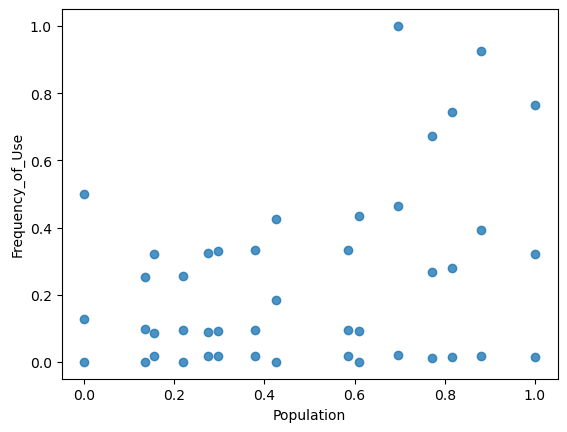

In [116]:
# visualise Population&Frequency_of_Use relationship
sns.regplot(x="Population", y="Frequency_of_Use", data=CVLR, fit_reg=False)

Text(0.5, 1.0, 'Relationship between Population and Frequency_of_Use by Country')

Text(0.5, 0, 'Population')

Text(0, 0.5, 'Frequency_of_Use')

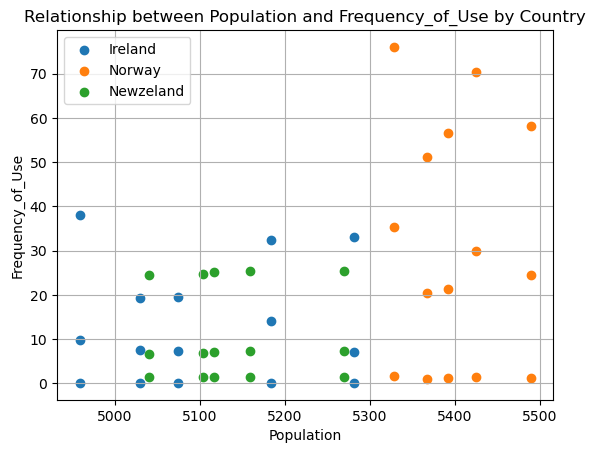

In [117]:
countries = merged_Population['Country'].unique()

for country in countries:
    country_data = merged_Population[merged_Population['Country'] == country]
    plt.scatter(country_data['Population'], country_data['Frequency_of_Use'], label=country)

plt.title('Relationship between Population and Frequency_of_Use by Country')
plt.xlabel('Population')
plt.ylabel('Frequency_of_Use')
plt.legend()
plt.grid(True)
plt.show()

# Chi-squared test 

In [118]:
#Mode of transport and frequency of use

In [119]:
from scipy import stats

In [120]:
CS = merged_Population.copy()

In [121]:
mean_by_transport = CS.groupby('Mode of Transport').mean().reset_index()

In [122]:
mean_by_transport= mean_by_transport.reset_index()[['Mode of Transport', 'Frequency_of_Use']]
mean_by_transport

Mode of Transport  Frequency_of_Use
0                        Bus         38.670658
1    Maritime transportation          0.957839
2  Tram and suburban railway         14.184116

In [123]:
CS['Mean'] = CS['Mode of Transport'].map(mean_by_transport.set_index('Mode of Transport')['Frequency_of_Use'])

In [124]:
CS['Relationship'] = np.where(CS['Frequency_of_Use'] >= CS['Mean'], 'YES', 'NO')

In [125]:
CS.head()

Year  Country          Mode of Transport       VALUE  Population  \
0  2019  Ireland                        Bus  188554.000      4958.5   
1  2019  Ireland  Tram and suburban railway   48345.000      4958.5   
2  2019  Ireland    Maritime transportation     864.886      4958.5   
3  2020  Ireland                        Bus   97520.000      5029.9   
4  2020  Ireland  Tram and suburban railway   37954.000      5029.9   

   Frequency_of_Use       Mean Relationship  
0         38.026419  38.670658           NO  
1          9.749924  14.184116           NO  
2          0.174425   0.957839           NO  
3         19.388059  38.670658           NO  
4          7.545677  14.184116           NO

Text(39, 0.0, '39.00')

Text(1, 1.0, '1.00')

Text(14, 2.0, '14.00')

Text(0.5, 0, 'Frequency of Use')

Text(0, 0.5, 'Mode of Transport')

Text(0.5, 1.0, 'Frequency of Use by Mode of Transport')

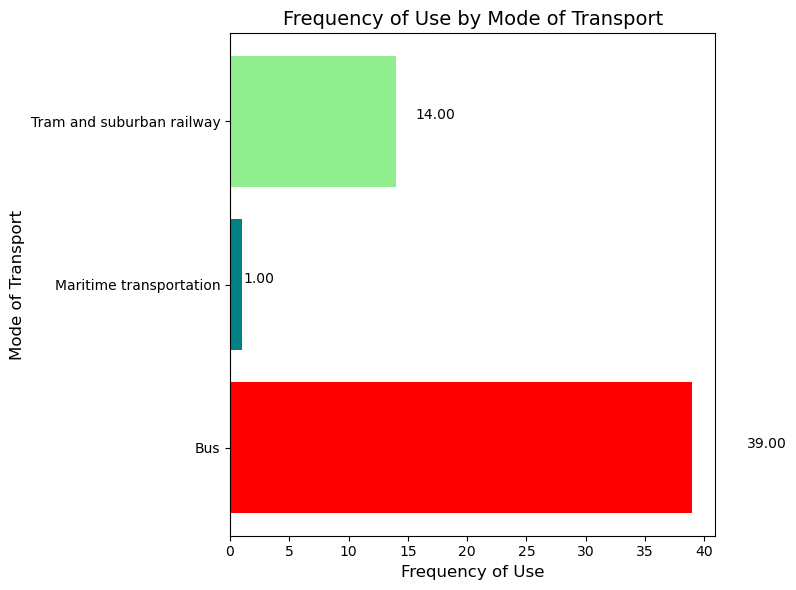

In [126]:
modes = ['Bus', 'Maritime transportation', 'Tram and suburban railway']
frequency_of_use = [39, 1, 14]

colors = ['r','teal','lightgreen']

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(modes, frequency_of_use, color=colors)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}', 
                xy=(width, bar.get_y() + bar.get_height() / 2),
                textcoords='offset points',
                fontsize=10)   
ax.grid(False)
    
ax.set_xlabel('Frequency of Use', fontsize=12)
ax.set_ylabel('Mode of Transport', fontsize=12)
ax.set_title('Frequency of Use by Mode of Transport', fontsize=14)


plt.tight_layout()
plt.show()

Currently in these three countries: Ireland, Norway and New Zealand the average most used transport is the bus, each person uses the bus about 39 times per year, sea transport at least once and some form of rail transport at least 14 times per year.

In [127]:
CS_table=pd.crosstab(CS['Mode of Transport'],CS['Relationship'])
print(CS_table)

Relationship               NO  YES
Mode of Transport                 
Bus                        10    5
Maritime transportation     5   10
Tram and suburban railway  10    5


In [128]:
#Applying Chi-square test of independence
val=stats.chi2_contingency(CS_table)
val

Chi2ContingencyResult(statistic=4.5, pvalue=0.10539922456186435, dof=2, expected_freq=array([[8.33333333, 6.66666667],
       [8.33333333, 6.66666667],
       [8.33333333, 6.66666667]]))

In this output, the p-value is approximately 0.105, which is greater than the commonly used significance level of 0.05. This indicates that there is not enough evidence to reject the null hypothesis. Therefore, the null hypothesis is accepted, suggesting that there is no significant relationship between the 'Mode of Transport' and 'Relationship' features in the dataset."

# Z TEST

In [129]:
from scipy.stats import norm

In [130]:
#How far below average is the use of bus transport in Ireland in 2019 that was covid

In [131]:
ZtestCS= CS.copy()

In [132]:
# Standard deviation of bus transportation usage
std_bus = ZtestCS[ZtestCS['Mode of Transport'] == 'Bus']['Frequency_of_Use'].std()
print(f"Standard deviation of bus transportation usage: {std_bus}")

Standard deviation of bus transportation usage: 18.86146332560974


In [133]:
# Mean of bus transportation usage
mean_bus = ZtestCS[ZtestCS['Mode of Transport'] == 'Bus']['Frequency_of_Use'].mean()
print(f"Mean of bus transportation usage: {mean_bus}")                                                         

Mean of bus transportation usage: 38.67065828423012


In [134]:
# Median of bus transportation usage
median_bus = ZtestCS[ZtestCS['Mode of Transport'] == 'Bus']['Frequency_of_Use'].median()
print(f"Median of bus transportation usage: {median_bus}")

Median of bus transportation usage: 32.40547839506173


In [135]:
# Standard error (alpha) of bus transportation usage
alpha_bus = np.std(ZtestCS[ZtestCS['Mode of Transport'] == 'Bus']['VALUE']) / np.sqrt(len(ZtestCS[ZtestCS['Mode of Transport'] == 'Bus']['Frequency_of_Use']))
print(f"Standard error of bus transportation usage: {alpha_bus}")

Standard error of bus transportation usage: 26097.39731983172


In [136]:
#2019

In [137]:
bus_2019 = ZtestCS[(ZtestCS['Mode of Transport'] == 'Bus') & (ZtestCS['Year'] == 2019)]['Frequency_of_Use']
mean_bus_2019 = bus_2019.mean()
std_bus_2019 = bus_2019.std()
print(f"mean_bus_2019:{mean_bus_2019}")
print(f"std_bus_2019:{std_bus_2019}")

mean_bus_2019:46.221755041402
std_bus_2019:26.680894629352288


In [138]:
expected_std = std_bus_2019
print(f"Standard deviation of bus transportation usage in 2019: {expected_std }")

Standard deviation of bus transportation usage in 2019: 26.680894629352288


In [139]:
z_score = (mean_bus_2019 - expected_std) / (std_bus_2019 / (len(bus_2019) ** 0.5))
p_value = stats.norm.sf(abs(z_score)) * 2  
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

Z-score: 1.2685392872863743
P-value: 0.2046054299685336


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Z-score')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Curve for Z-score and p-value')

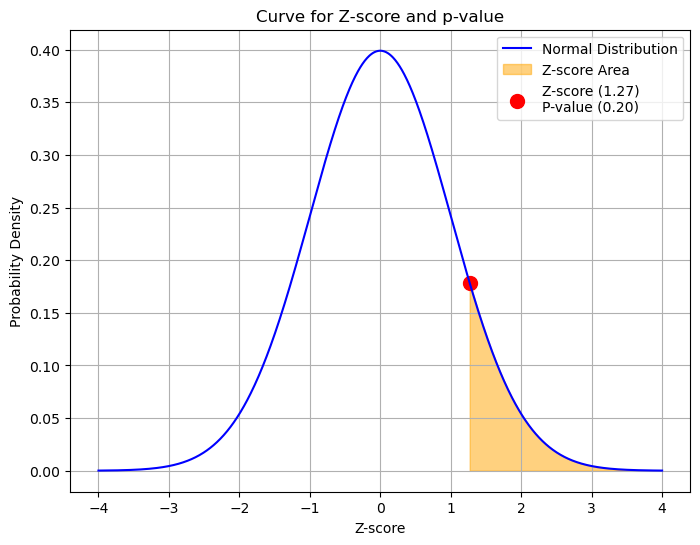

In [140]:
z_score = 1.2685392872863743
p_value = 0.2046054299685336


x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  


plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='Normal Distribution')

# Shade the area corresponding to the obtained Z-score
plt.fill_between(x, y, where=(x >= z_score), color='orange', alpha=0.5, label='Z-score Area')

# Highlight the point corresponding to the Z-score and p-value
plt.scatter(z_score, norm.pdf(z_score, 0, 1), color='red', s=100, label=f'Z-score ({z_score:.2f})\nP-value ({p_value:.2f})')

plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Curve for Z-score and p-value')
plt.legend()
plt.grid(True)

plt.show()

# Wilcoxon

In [141]:
#Difference in growth in bus transportation use from 2019 and 2020 as a result of covid

In [142]:
from scipy.stats import wilcoxon

In [143]:
wilcoxontest= CS.copy()

In [144]:
df2019 = wilcoxontest[
    (wilcoxontest['Year'] == 2019) &
    (wilcoxontest['Mode of Transport'] == 'Bus')]


df2020= wilcoxontest[
    (wilcoxontest['Year'] == 2020) &
    (wilcoxontest['Mode of Transport'] == 'Bus')]

In [145]:
values_2019 = df2019['Frequency_of_Use']
values_2020 = df2020['Frequency_of_Use']

In [146]:
# Performing the Wilcoxon signed-rank test
wilcoxon_stat, p_value = wilcoxon(values_2019, values_2020)

# Printing the Wilcoxon statistic and the p-value
print(f"Wilcoxon Statistic: {wilcoxon_stat}")
print(f"p-value: {p_value}")

Wilcoxon Statistic: 1.0
p-value: 0.5


The p-value obtained is 0.5, which exceeds the conventional significance level of 0.05. Consequently, with a p-value of 0.5, there isn't adequate evidence to reject the null hypothesis. This implies that, based on the provided data, there is no statistically significant difference observed between the two groups being compared.

# ANOVA

In [147]:
#Interaction and relationship between country and mode of transport 

In [148]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [149]:
import statsmodels.api as sm
import pingouin as pg

In [150]:
aov= pg.anova(data=CS, dv='Frequency_of_Use', between=['Country', 'Mode of Transport'], detailed=True)
print(aov)

                        Source            SS  DF           MS           F  \
0                      Country   3304.264854   2  1652.132427   65.134610   
1            Mode of Transport  10983.909266   2  5491.954633  216.517947   
2  Country * Mode of Transport   2078.515287   4   519.628822   20.486143   
3                     Residual    913.136159  36    25.364893         NaN   

          p-unc       np2  
0  1.093532e-12  0.783484  
1  8.545462e-21  0.923247  
2  7.141101e-09  0.694772  
3           NaN       NaN  


The p-values for the interaction effects between Country and Mode of Transport (7.141101e-09) significantly fall below the significance level of 0.05. This suggests a statistically significant interaction effect between these factors, indicating that the relationship or combined influence of Country and Mode of Transport significantly impacts the dependent variable.

Additionally, the np2 values show the proportion of variability explained by each factor. Country (np2 = 0.783484) and Mode of Transport (np2 = 0.923247) both exhibit a high proportion of explained variability, indicating substantial influence on the dependent variable.

# Logistic Regression

# Model Building

Splitting data into a training set and a test set.

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Dummy Variable Creation

In [152]:
# Creating a dummy variable for the variable 'Country' and dropping the first one.
con = pd.get_dummies(merged_Population['Country'],prefix='Country',drop_first=True)

#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,con],axis=1)

# Creating a dummy variable for the variable 'Mode of Transport' and dropping the first one.
moft = pd.get_dummies(merged_Population['Mode of Transport'],prefix='Mode of Transport',drop_first=True)

#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,moft],axis=1)

In [153]:
merged_Population.head()

Year  Country          Mode of Transport       VALUE  Population  \
0  2019  Ireland                        Bus  188554.000      4958.5   
1  2019  Ireland  Tram and suburban railway   48345.000      4958.5   
2  2019  Ireland    Maritime transportation     864.886      4958.5   
3  2020  Ireland                        Bus   97520.000      5029.9   
4  2020  Ireland  Tram and suburban railway   37954.000      5029.9   

   Frequency_of_Use  Country_Newzeland  Country_Norway  \
0         38.026419                  0               0   
1          9.749924                  0               0   
2          0.174425                  0               0   
3         19.388059                  0               0   
4          7.545677                  0               0   

   Mode of Transport_Maritime transportation  \
0                                          0   
1                                          0   
2                                          1   
3                                          0   
4                                          0   

   Mode of Transport_Tram and suburban railway  
0                                            0  
1                                            1  
2                                            0  
3                                            0  
4                                            1

# Checking outliers at 25%,50%,75%,90%,95% and 99%

In [154]:
merged_Population.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Year          VALUE   Population  Frequency_of_Use  \
count    45.000000      45.000000    45.000000         45.000000   
mean   2021.000000   94645.863378  5214.601000         17.937538   
std       1.430194  106363.922479   158.885554         19.817248   
min    2019.000000     500.232000  4958.500000          0.094712   
25%    2020.000000    7359.300000  5074.700000          1.426470   
50%    2021.000000   39021.050000  5184.000000          7.545677   
75%    2022.000000  133916.490000  5367.580000         25.414957   
90%    2023.000000  240016.600000  5425.270000         45.875225   
95%    2023.000000  316250.000000  5476.241200         57.816425   
99%    2023.000000  394775.040000  5488.984000         73.527760   
max    2023.000000  405152.000000  5488.984000         76.039016   

       Country_Newzeland  Country_Norway  \
count          45.000000       45.000000   
mean            0.333333        0.333333   
std             0.476731        0.476731   
min             0.000000        0.000000   
25%             0.000000        0.000000   
50%             0.000000        0.000000   
75%             1.000000        1.000000   
90%             1.000000        1.000000   
95%             1.000000        1.000000   
99%             1.000000        1.000000   
max             1.000000        1.000000   

       Mode of Transport_Maritime transportation  \
count                                  45.000000   
mean                                    0.333333   
std                                     0.476731   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
90%                                     1.000000   
95%                                     1.000000   
99%                                     1.000000   
max                                     1.000000   

       Mode of Transport_Tram and suburban railway  
count                                    45.000000  
mean                                      0.333333  
std                                       0.476731  
min                                       0.000000  
25%                                       0.000000  
50%                                       0.000000  
75%                                       1.000000  
90%                                       1.000000  
95%                                       1.000000  
99%                                       1.000000  
max                                       1.000000

In [155]:
# Checking the percentage of missing values
round(100*(merged_Population.isnull().sum()/len(merged_Population.index)), 2)

Year                                           0.0
Country                                        0.0
Mode of Transport                              0.0
VALUE                                          0.0
Population                                     0.0
Frequency_of_Use                               0.0
Country_Newzeland                              0.0
Country_Norway                                 0.0
Mode of Transport_Maritime transportation      0.0
Mode of Transport_Tram and suburban railway    0.0
dtype: float64

# Feature Standardisation

Checking for Outliers

In [156]:
merged_Population.dtypes

Year                                             int32
Country                                         object
Mode of Transport                               object
VALUE                                          float64
Population                                     float64
Frequency_of_Use                               float64
Country_Newzeland                                uint8
Country_Norway                                   uint8
Mode of Transport_Maritime transportation        uint8
Mode of Transport_Tram and suburban railway      uint8
dtype: object

Normalising continuous features

In [157]:
FS= merged_Population[['Frequency_of_Use','Population','VALUE']]

In [158]:
normalized_FS=(FS-FS.mean())/FS.std()

In [159]:
merged_Population = merged_Population.drop(['Frequency_of_Use','Population','VALUE'], 1)

In [160]:
merged_Population = pd.concat([merged_Population,normalized_FS],axis=1)

In [161]:
merged_Population .head()

Year  Country          Mode of Transport  Country_Newzeland  \
0  2019  Ireland                        Bus                  0   
1  2019  Ireland  Tram and suburban railway                  0   
2  2019  Ireland    Maritime transportation                  0   
3  2020  Ireland                        Bus                  0   
4  2020  Ireland  Tram and suburban railway                  0   

   Country_Norway  Mode of Transport_Maritime transportation  \
0               0                                          0   
1               0                                          0   
2               0                                          1   
3               0                                          0   
4               0                                          0   

   Mode of Transport_Tram and suburban railway  Frequency_of_Use  Population  \
0                                            0          1.013707   -1.611858   
1                                            1         -0.413156   -1.611858   
2                                            0         -0.896346   -1.611858   
3                                            0          0.073195   -1.162478   
4                                            1         -0.524385   -1.162478   

      VALUE  
0  0.882895  
1 -0.435306  
2 -0.881699  
3  0.027022  
4 -0.532999

# Splitting Data into Training and Test Sets

In [162]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [163]:
X.shape, y.shape

((45, 7), (45,))

In [164]:
y.head()

0    0.882895
1   -0.435306
2   -0.881699
3    0.027022
4   -0.532999
Name: VALUE, dtype: float64

In [165]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [166]:
X_train.shape

(31, 7)

# Running the First 

In [167]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [168]:
import statsmodels.api as sm

In [169]:
X_train

Year  Country_Newzeland  Country_Norway  \
20  2020                  0               1   
7   2021                  0               0   
42  2023                  1               0   
18  2020                  0               1   
21  2021                  0               1   
13  2023                  0               0   
1   2019                  0               0   
37  2021                  1               0   
12  2023                  0               0   
35  2020                  1               0   
22  2021                  0               1   
9   2022                  0               0   
16  2019                  0               1   
26  2022                  0               1   
28  2023                  0               1   
11  2022                  0               0   
4   2020                  0               0   
41  2022                  1               0   
43  2023                  1               0   
14  2023                  0               0   
36  2021                  1               0   
2   2019                  0               0   
34  2020                  1               0   
30  2019                  1               0   
10  2022                  0               0   
15  2019                  0               1   
23  2021                  0               1   
39  2022                  1               0   
3   2020                  0               0   
24  2022                  0               1   
8   2021                  0               0   

    Mode of Transport_Maritime transportation  \
20                                          0   
7                                           0   
42                                          0   
18                                          0   
21                                          0   
13                                          0   
1                                           0   
37                                          0   
12                                          0   
35                                          1   
22                                          1   
9                                           0   
16                                          1   
26                                          0   
28                                          1   
11                                          1   
4                                           0   
41                                          1   
43                                          0   
14                                          1   
36                                          0   
2                                           1   
34                                          0   
30                                          0   
10                                          0   
15                                          0   
23                                          0   
39                                          0   
3                                           0   
24                                          0   
8                                           1   

    Mode of Transport_Tram and suburban railway  Frequency_of_Use  Population  
20                                            1          0.126913    0.962825  
7                                             1         -0.541697   -0.880514  
42                                            0          0.377319    0.343637  
18                                            0          1.673806    0.962825  
21                                            0          1.946893    1.112549  
13                                            1         -0.551473    0.421681  
1                                             1         -0.413156   -1.611858  
37                                            1         -0.545533   -0.617432  
12                                            0          0.761905    0.421681  
35                                            0         -0.835910   -0.697993  
22                                            0   

In [170]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 20 to 8
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         31 non-null     int32  
 1   Country_Newzeland                            31 non-null     uint8  
 2   Country_Norway                               31 non-null     uint8  
 3   Mode of Transport_Maritime transportation    31 non-null     uint8  
 4   Mode of Transport_Tram and suburban railway  31 non-null     uint8  
 5   Frequency_of_Use                             31 non-null     float64
 6   Population                                   31 non-null     float64
dtypes: float64(2), int32(1), uint8(4)
memory usage: 992.0 bytes


In [171]:
import statsmodels.api as sm

# Agregar la constante para el término de intercepción
X_train = sm.add_constant(X_train)

# Crear y ajustar el modelo de regresión logística
logm1 = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logm1_result = logm1.fit()

# Obtener el resumen del modelo
print(logm1_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  VALUE   No. Observations:                   31
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Jan 2024   Deviance:                       1486.1
Time:                        20:15:51   Pearson chi2:                 7.77e+16
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [172]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                   31
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Jan 2024   Deviance:                       1486.1
Time:                        20:15:51   Pearson chi2:                 7.77e+16
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -7.287e+16   5.13e+10  -1.42e+06      0.000   -7.29e+16   -7.29e+16
Year                                         3.445e+13   2.54e+07   1.36e+06      0.000    3.44e+13    3.44e+13
Country_Newzeland                            2.368e+14   3.18e+07   7.46e+06      0.000    2.37e+14    2.37e+14
Country_Norway                               3.709e+15   1.19e+08   3.11e+07      0.000    3.71e+15    3.71e+15
Mode of Transport_Maritime transportation   -6.979e+15    6.5e+07  -1.07e+08      0.000   -6.98e+15   -6.98e+15
Mode of Transport_Tram and suburban railway -1.954e+15    4.8e+07  -4.07e+07      0.000   -1.95e+15   -1.95e+15
Frequency_of_Use                             6.428e+15   2.91e+07   2.21e+08      0.000    6.43e+15    6.43e+15
Population                                  -7.798e+14   6.25e+07  -1.25e+07      0.000    -7.8e+14    -7.8e+14
===============================================================================================================
"""

# Correlation Matrix

In [173]:
import seaborn as sns
%matplotlib inline

<Figure size 2000x1000 with 0 Axes>

<Axes: >

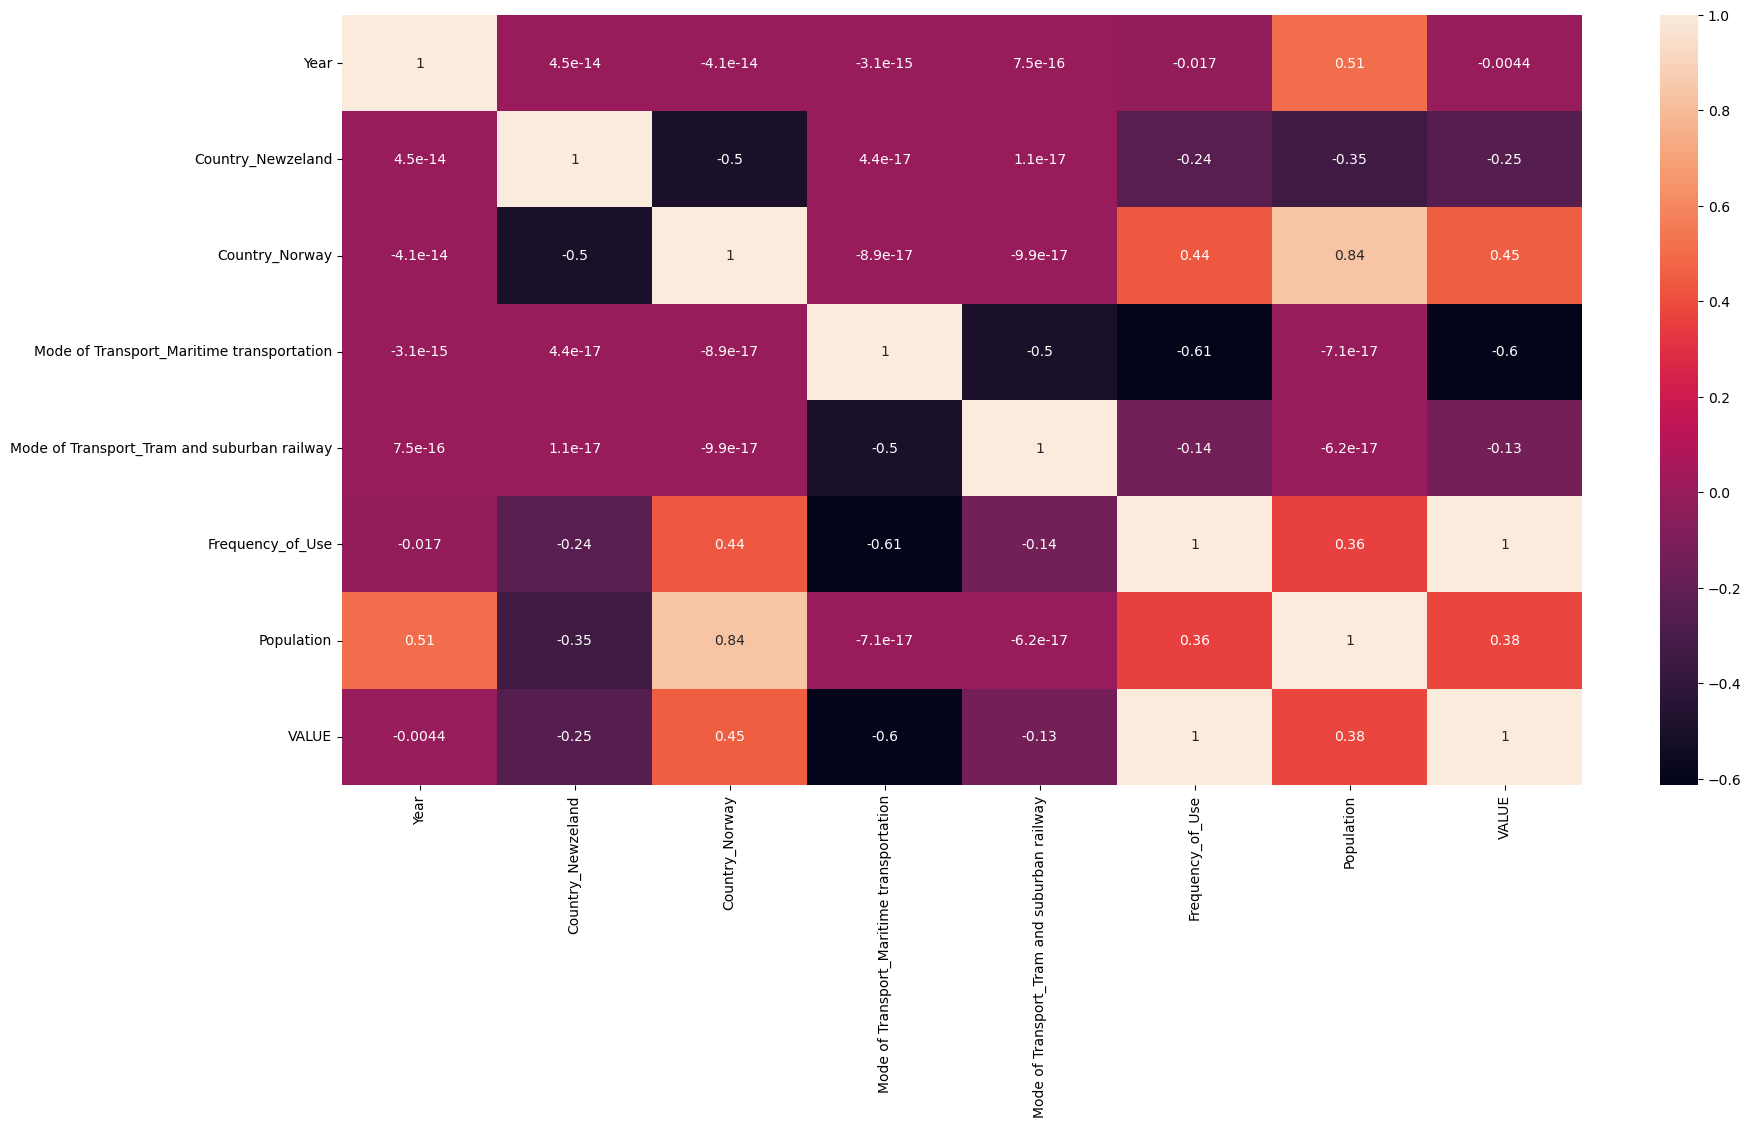

In [174]:
plt.figure(figsize = (20,10))        
sns.heatmap(merged_Population.corr(),annot = True)

The LogisticRegression model is not successful because it is used for classification problems and in this objective it is desired to predict, so another model will be used. 

# RandomForestRegressor

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [176]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [177]:
print(X.shape)
print(y.shape) 

(45, 7)
(45,)


In [178]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [179]:
model=RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [180]:
# Making predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([ 0.73844722,  0.83466935,  0.34255824,  0.35277765, -0.53434037,
       -0.82414139, -0.82054327,  2.09005292, -0.54483123,  0.13364557,
        0.71256444,  2.51305283, -0.52071852,  0.37118766, -0.88173341,
       -0.48166729, -0.82230601, -0.55381608])

In [181]:
# Evaluating the model performance (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.002225339282193793


Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Comparison between Actual and Predicted Values')

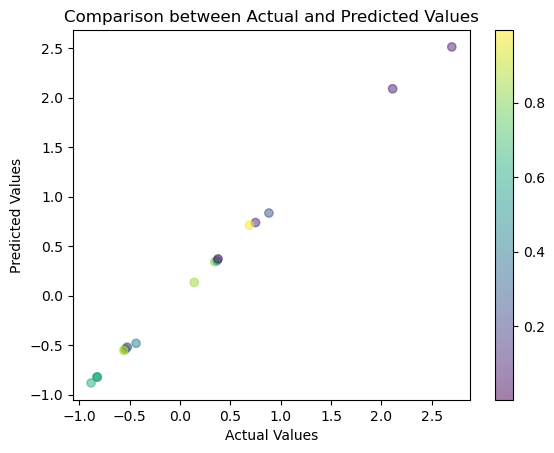

In [182]:
color_variable = np.random.rand(len(y_test))

plt.scatter(y_test, y_pred, c=color_variable, cmap='viridis', alpha=0.5)
plt.colorbar()  # Add a color bar
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between Actual and Predicted Values')
plt.show()

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residuals vs. Actual Values')

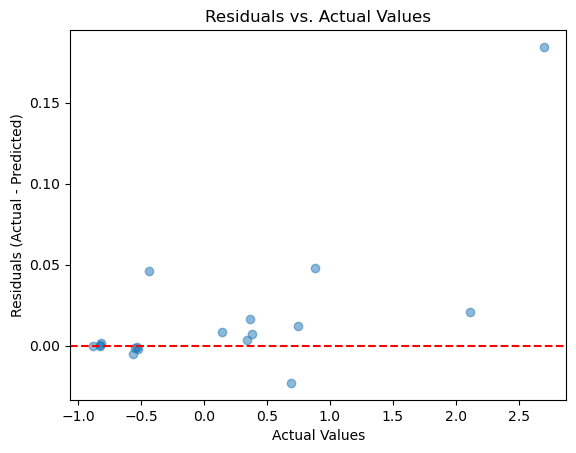

In [183]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Actual Values')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.show()

# Making predictions

In [184]:
RFpredictions = pd.DataFrame(columns=['Year', 'Country', 'Mode of Transport', 'Predicted_VALUE', 'Predicted_Population'])

unique_countries = MP['Country'].unique()
unique_transport_modes = MP['Mode of Transport'].unique()

In [185]:
for country in unique_countries:
    for transport_mode in unique_transport_modes:
        subset = MP[(MP['Country'] == country) & (MP['Mode of Transport'] == transport_mode)]
        if not subset.empty:
            X = subset[['Year']]
            y_value = subset['VALUE']
            y_population = subset['Population']
            y_frequency = subset['Frequency_of_Use']
            
            model_value = RandomForestRegressor()
            model_value.fit(X, y_value)
            future_years = pd.DataFrame({'Year': range(2024, 2029)})  # Next 5 years
            future_predictions_value = model_value.predict(future_years)
            
            model_population = RandomForestRegressor()
            model_population.fit(X, y_population)
            future_predictions_population = model_population.predict(future_years)
            
            model_frequency = RandomForestRegressor()
            model_frequency.fit(X, y_frequency)
            future_predictions_frequency = model_frequency.predict(future_years)

            RFpredictions = pd.concat([RFpredictions, pd.DataFrame({
                'Year': future_years['Year'],
                'Country': country,
                'Mode of Transport': transport_mode,
                'Predicted_VALUE': future_predictions_value,
                'Predicted_Population': future_predictions_population,
                'Predicted_Frequency_of_Use': future_predictions_frequency
            })])

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

In [186]:
RFpredictions.head()

Year  Country Mode of Transport  Predicted_VALUE  Predicted_Population  \
0  2024  Ireland               Bus        166706.38              5235.651   
1  2025  Ireland               Bus        166706.38              5235.651   
2  2026  Ireland               Bus        166706.38              5235.651   
3  2027  Ireland               Bus        166706.38              5235.651   
4  2028  Ireland               Bus        166706.38              5235.651   

   Predicted_Frequency_of_Use  
0                   32.193682  
1                   32.193682  
2                   32.193682  
3                   32.193682  
4                   32.193682

# Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [188]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [189]:
print(X.shape)
print(y.shape) 

(45, 7)
(45,)


In [190]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [191]:
model=LinearRegression()
model.fit(X, y)

LinearRegression()

In [192]:
# Making predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([-0.54914238,  0.28151249, -0.57055303, -0.43988076, -0.79429468,
       -0.8102276 , -0.51693904, -0.80918472, -0.84156338,  2.67913891,
        0.96631394, -0.18574198, -0.90999285, -0.87860308, -0.54460385,
        2.05946549, -0.83161581, -0.80137563])

In [193]:
# Evaluating the model performance (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0006908964722625448


Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Comparison between Actual and Predicted Values')

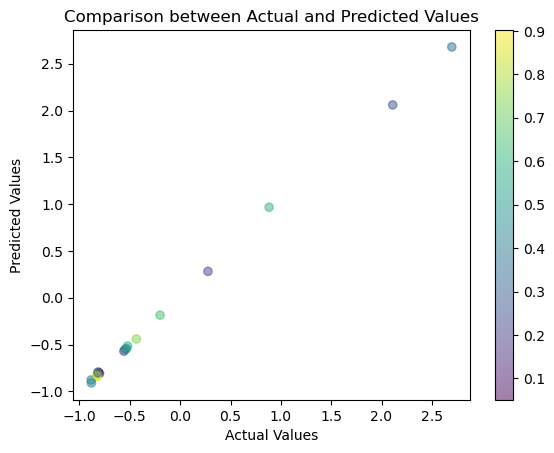

In [194]:
color_variable = np.random.rand(len(y_test))

plt.scatter(y_test, y_pred, c=color_variable, cmap='viridis', alpha=0.5)
plt.colorbar()  # Add a color bar
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between Actual and Predicted Values')
plt.show()

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residuals vs. Actual Values')

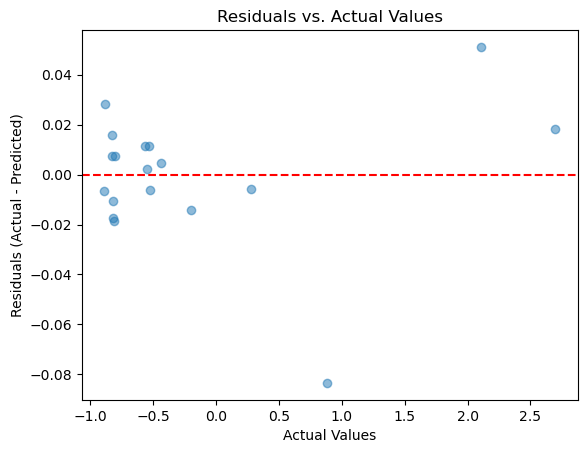

In [195]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Actual Values')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.show()

# Making predictions

In [196]:
LRpredictions = pd.DataFrame(columns=['Year', 'Country', 'Mode of Transport', 'Predicted_VALUE', 'Predicted_Population'])

In [197]:
# Get unique countries and transport modes
unique_countries = MP['Country'].unique()
unique_transport_modes = MP['Mode of Transport'].unique()

In [198]:
for country in unique_countries:
    for transport_mode in unique_transport_modes:
        subset = MP[(MP['Country'] == country) & (MP['Mode of Transport'] == transport_mode)]
        if not subset.empty:
            X = subset[['Year']]
            y_value = subset['VALUE']
            y_population = subset['Population']
            y_frequency = subset['Frequency_of_Use']
            
            model_value = LinearRegression()
            model_value.fit(X, y_value)
            future_years = pd.DataFrame({'Year': range(2024, 2029)})  # Next 5 years
            future_predictions_value = model_value.predict(future_years)
            
            model_population = LinearRegression()
            model_population.fit(X, y_population)
            future_predictions_population = model_population.predict(future_years)
            
            model_frequency = LinearRegression()
            model_frequency.fit(X, y_frequency)
            future_predictions_frequency = model_frequency.predict(future_years)
            
            LRpredictions = pd.concat([LRpredictions, pd.DataFrame({
                'Year': future_years['Year'],
                'Country': country,
                'Mode of Transport': transport_mode,
                'Predicted_VALUE': future_predictions_value,
                'Predicted_Population': future_predictions_population,
                'Predicted_Frequency_of_Use': future_predictions_frequency
            })])

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [199]:
LRpredictions.head()

Year  Country Mode of Transport  Predicted_VALUE  Predicted_Population  \
0  2024  Ireland               Bus         158291.2               5345.83   
1  2025  Ireland               Bus         162524.4               5425.86   
2  2026  Ireland               Bus         166757.6               5505.89   
3  2027  Ireland               Bus         170990.8               5585.92   
4  2028  Ireland               Bus         175224.0               5665.95   

   Predicted_Frequency_of_Use  
0                   29.400306  
1                   29.704042  
2                   30.007778  
3                   30.311514  
4                   30.615250

# SVM

In [200]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import r2_score

In [201]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [202]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [203]:
#Training SVR model
model = SVR()
model.fit(X_train, y_train)
print(model)

SVR()

SVR()


In [204]:
#Predict the target value for test data
expected_y  = y_test
predicted_y = model.predict(X_test)

In [205]:
r2 = r2_score(expected_y, predicted_y)
mse = mean_squared_error(expected_y, predicted_y)

print(f'R² Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R² Score: -0.1421432863812664
Mean Squared Error (MSE): 0.9749707417678776


<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='VALUE'>

Text(0.5, 0, 'Expected Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Expected vs Predicted Values')

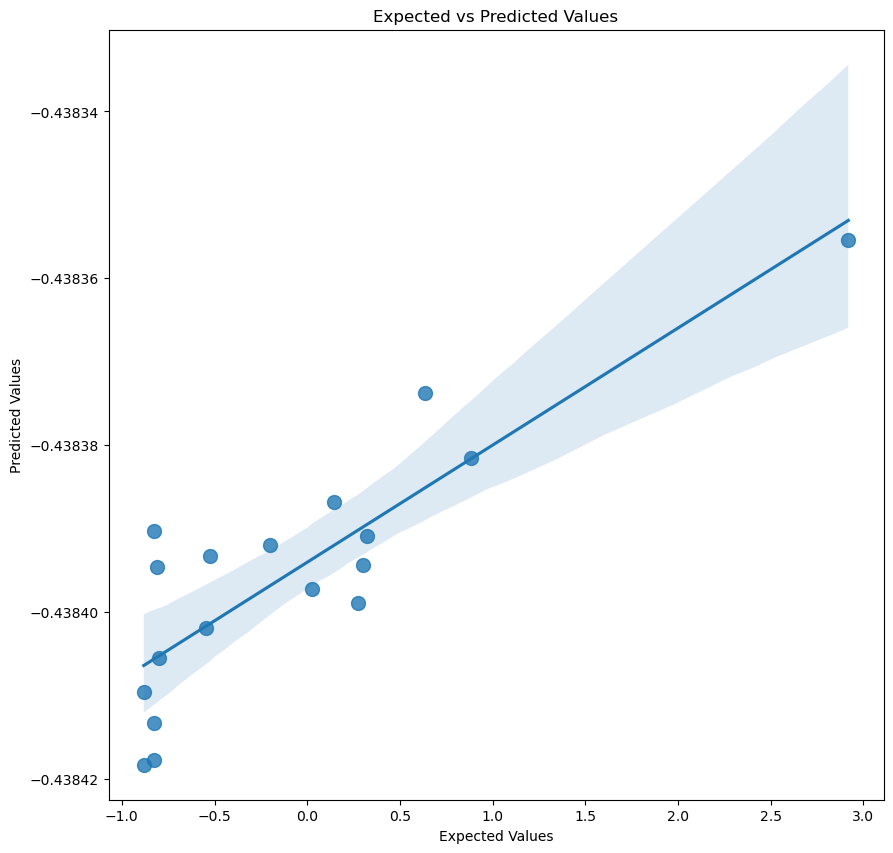

In [206]:
plt.figure(figsize=(10, 10))
sns.regplot(x=expected_y, y=predicted_y, scatter_kws={"s": 100})
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Expected vs Predicted Values')
plt.show()

# Final dataframe

In [207]:
RFpredictions.rename(columns={'Predicted_VALUE': 'VALUE', 'Predicted_Population': 'Population', 'Predicted_Frequency_of_Use':'Frequency_of_Use'}, inplace=True)

In [208]:
MP = pd.concat([MP,RFpredictions])

## Interactive visualization of geographic data for frequency of use

In [209]:
# Country codes
def Code(row):
    if row['Country'] == 'Ireland':
        return 'IRL'
    if row['Country'] == 'Norway':
        return 'NOR'
    if row['Country'] == 'Newzeland':
        return 'NZL'

MP['Code'] = MP.apply(Code, axis=1)
MP.head()

Year  Country          Mode of Transport       VALUE  Population  \
0  2019  Ireland                        Bus  188554.000      4958.5   
1  2019  Ireland  Tram and suburban railway   48345.000      4958.5   
2  2019  Ireland    Maritime transportation     864.886      4958.5   
3  2020  Ireland                        Bus   97520.000      5029.9   
4  2020  Ireland  Tram and suburban railway   37954.000      5029.9   

   Frequency_of_Use Code  
0         38.026419  IRL  
1          9.749924  IRL  
2          0.174425  IRL  
3         19.388059  IRL  
4          7.545677  IRL

# Bus

In [210]:
bus= MP[MP['Mode of Transport'] == 'Bus']

In [211]:
fig = px.choropleth(bus, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"natural earth2"})
)

# TRAM

In [212]:
Tram= MP[MP['Mode of Transport'] == 'Tram and suburban railway']

In [215]:
fig = px.choropleth(Tram, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'Tram : Frequency of Use',
    geo = dict(projection={'type':"cylindrical stereographic"})
)

# Maritime_transportation

In [216]:
Maritime_transportation= MP[MP['Mode of Transport'] == 'Maritime transportation']

In [217]:
fig = px.choropleth(Maritime_transportation, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'Maritime_transportation : Frequency of Use',
    geo = dict(projection={'type':"guyou"})
)

# Sentiment analysis

The process of analyzing digital text to determine whether the emotional tone of the message is positive, negative or neutral in this case the first sentimental analysis is to see what people are saying about 'LUAS' one of the most important public transport in Ireland.  

In [216]:
!pip install praw
!pip install python-dotenv

Packages

In [217]:
import os

In [218]:
import re
import string
from string import punctuation
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime as dt

import praw
from dotenv import load_dotenv
from os import getenv
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [219]:
from dotenv import load_dotenv
from os import getenv

In [220]:
load_dotenv()

True

Login to the account using secret credentials using the notepad with the previously saved .env credentials 

In [221]:
APP_NAME = os.getenv('APP_NAME')
APP_ID = os.getenv('APP_ID')
APP_SECRET = os.getenv('APP_SECRET')
USERNAME = os.getenv('USERNAME')
PASSWORD= os.getenv('PASSWORD')

In [222]:
# Checking of all loaded variables

if APP_NAME is None or APP_ID is None or APP_SECRET is None or USERNAME is None or PASSWORD is None:
    print("ERROR: Some credentials not loaded!")
else:
    print("Credentials loaded")

Credentials loaded


In [223]:
reddit = praw.Reddit(client_id=getenv("APP_ID"),
    client_secret=getenv("APP_SECRET"),
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", 
)

In [224]:
print(reddit.read_only)

True


In [225]:
subreddit = reddit.subreddit("Python")

Set to store headlines

In [226]:
headlines = set()

# Labeling Data

In [227]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [228]:
# Collect post titles
for submission in reddit.subreddit('ireland').search('LUAS'):
    headlines.add(submission.title)
    print(submission.title)

# Apply sentiment analysis to the titles
sia= SIA()
result = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headlines'] = line
    result.append(pol_score)

print(result[:3])

I worked as Luas Security for 4 Years AMA
Scrotes on the Luas
Men harassing women at luas stop in Dublin
Have you seen an act of kindness on the Luas?
Teenagers in court over ‘pile in’ attack on Indian student on Luas
Luas fined me for not paying a €0 fare
Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
They set the Luas Ablaze
Close call on the Luas?
Never mind, I just remembered the LUAS is free.
Luas never disappoints...
Luas Inspectors gone mad with power.
Red Cow Luas Stop today
Woman 'kicked and abused' by group of teens on Luas
Respect to the Luas Driver
Horses are returning to the LUAS, nature is healing, we are the virus
Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Man stands infront of moving LUAS.
Blackhorse Luas Stop
Sandyford Luas - Luas stop security
Luas Red line...use enough and see yourself become the villain.
Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Found thi

In [229]:
# Convert the results into a DataFrame
df = pd.DataFrame.from_records(result)
df.head()

neg    neu    pos  compound  \
0  0.000  0.750  0.250    0.4588   
1  0.000  1.000  0.000    0.0000   
2  0.000  0.842  0.158    0.4939   
3  0.487  0.513  0.000   -0.6908   
4  0.286  0.714  0.000   -0.5574   

                                           headlines  
0      Have you seen an act of kindness on the Luas?  
1  Luas tracks causing rise in cycling injuries, ...  
2  When you bring your friend up from the country...  
3         Men harassing women at luas stop in Dublin  
4  Luas Red line...use enough and see yourself be...

In [230]:
#Convert label to a numerical variable

With the labels and the value given to the words it is possible to perform the analysis to see if the words of the comments being analyzed are positive, negative or neutral. 

In [231]:
df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1
df.head()

neg    neu    pos  compound  \
0  0.000  0.750  0.250    0.4588   
1  0.000  1.000  0.000    0.0000   
2  0.000  0.842  0.158    0.4939   
3  0.487  0.513  0.000   -0.6908   
4  0.286  0.714  0.000   -0.5574   

                                           headlines  label  
0      Have you seen an act of kindness on the Luas?      1  
1  Luas tracks causing rise in cycling injuries, ...      0  
2  When you bring your friend up from the country...      1  
3         Men harassing women at luas stop in Dublin     -1  
4  Luas Red line...use enough and see yourself be...     -1

# Dataset Info and Stadistics

In [232]:
df2= df[['headlines','label']]
df2.to_csv('reddit_headline_labels.cvs', mode='a',encoding='utf-8',index=False)

In [233]:
df2

headlines  label
0       Have you seen an act of kindness on the Luas?      1
1   Luas tracks causing rise in cycling injuries, ...      0
2   When you bring your friend up from the country...      1
3          Men harassing women at luas stop in Dublin     -1
4   Luas Red line...use enough and see yourself be...     -1
..                                                ...    ...
95  Anti-Corruption garda returns medal after bein...      1
96  Are there any new Metrolink or Luas lines in p...      0
97  Man who sexually assaulted woman on Luas tram ...     -1
98              Biden is blocking my luas omw to work     -1
99  Luas reduced timetable on St. Patrick’s Day sl...      0

[100 rows x 2 columns]


# Classification

In [234]:
numpy_array = df2.values
X = numpy_array[:,0]
Y = numpy_array[:,-1]
Y = Y.astype('int')
print("X")
print(X)
print("Y")
print(Y)

X
['Have you seen an act of kindness on the Luas?'
 'Luas tracks causing rise in cycling injuries, says hospital worker'
 'When you bring your friend up from the country and have to go on the red luas line'
 'Men harassing women at luas stop in Dublin'
 'Luas Red line...use enough and see yourself become the villain.'
 'Dublin Bus in competition with the Luas'
 'Transdev implements pay cut for Luas drivers'
 'Garda who used Luas during Dublin Marathon claims incident was misunderstanding'
 'Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case'
 'Please look out for each other on the Luas' 'They set the Luas Ablaze'
 'Dublin Bus, Luas and Go-Ahead fined €5m for delays and no shows'
 "'Bitter blow' as route announcement for Cork Luas delayed again"
 'As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem'
 'Vandals Smear Luas Signage' 'Red Cow Luas Stop today'
 "Man's jaw broken in attack at Luas anti-social 

Vectorization of words


In [235]:
# create an object of CountVectorizer() class 
vec = CountVectorizer( )
vec

CountVectorizer()

In [236]:
vec.fit(X)
vec.vocabulary_

CountVectorizer()

{'have': 193,
 'you': 470,
 'seen': 355,
 'an': 28,
 'act': 14,
 'of': 288,
 'kindness': 229,
 'on': 293,
 'the': 405,
 'luas': 245,
 'tracks': 423,
 'causing': 82,
 'rise': 340,
 'in': 209,
 'cycling': 113,
 'injuries': 215,
 'says': 348,
 'hospital': 204,
 'worker': 465,
 'when': 453,
 'bring': 67,
 'your': 471,
 'friend': 167,
 'up': 435,
 'from': 169,
 'country': 105,
 'and': 29,
 'to': 417,
 'go': 179,
 'red': 326,
 'line': 240,
 'men': 257,
 'harassing': 191,
 'women': 461,
 'at': 40,
 'stop': 385,
 'dublin': 134,
 'use': 437,
 'enough': 143,
 'see': 354,
 'yourself': 472,
 'become': 46,
 'villain': 444,
 'bus': 71,
 'competition': 97,
 'with': 459,
 'transdev': 430,
 'implements': 208,
 'pay': 308,
 'cut': 112,
 'for': 163,
 'drivers': 132,
 'garda': 174,
 'who': 455,
 'used': 438,
 'during': 136,
 'marathon': 251,
 'claims': 91,
 'incident': 210,
 'was': 448,
 'misunderstanding': 263,
 'eagle': 138,
 'eyed': 151,
 'spots': 377,
 'upskirting': 436,
 'offender': 290,
 'unearths':

 It has converted the documents into a set of unique words alphabetically sorted and indexed.

In [237]:
# removing the stop words
vec = CountVectorizer(stop_words='english' )
vec.fit(X)
vec.vocabulary_

CountVectorizer(stop_words='english')

{'seen': 289,
 'act': 13,
 'kindness': 182,
 'luas': 197,
 'tracks': 347,
 'causing': 61,
 'rise': 275,
 'cycling': 92,
 'injuries': 172,
 'says': 283,
 'hospital': 164,
 'worker': 379,
 'bring': 49,
 'friend': 136,
 'country': 84,
 'red': 261,
 'line': 192,
 'men': 208,
 'harassing': 157,
 'women': 375,
 'stop': 317,
 'dublin': 112,
 'use': 360,
 'villain': 367,
 'bus': 53,
 'competition': 76,
 'transdev': 354,
 'implements': 166,
 'pay': 244,
 'cut': 91,
 'drivers': 110,
 'garda': 142,
 'used': 361,
 'marathon': 203,
 'claims': 70,
 'incident': 167,
 'misunderstanding': 214,
 'eagle': 114,
 'eyed': 125,
 'spots': 309,
 'upskirting': 359,
 'offender': 232,
 'unearths': 358,
 'sinister': 300,
 'case': 60,
 'look': 195,
 'set': 291,
 'ablaze': 7,
 'ahead': 17,
 'fined': 132,
 '5m': 2,
 'delays': 100,
 'shows': 297,
 'bitter': 36,
 'blow': 45,
 'route': 276,
 'announcement': 22,
 'cork': 80,
 'delayed': 99,
 'overcrowding': 237,
 'puts': 255,
 'passengers': 240,
 'nta': 227,
 'plans': 24

In [238]:
# another way of representing the features
X_transformed=vec.transform(X)
X_transformed

<100x384 sparse matrix of type '<class 'numpy.int64'>'
	with 581 stored elements in Compressed Sparse Row format>

X_tranformed is a 100 x 384 sparse matrix. It has 100 rows for each of our 384 documents and 581 columns each 

In [239]:
print(X_transformed)

  (0, 13)	1
  (0, 182)	1
  (0, 197)	1
  (0, 289)	1
  (1, 61)	1
  (1, 92)	1
  (1, 164)	1
  (1, 172)	1
  (1, 197)	1
  (1, 275)	1
  (1, 283)	1
  (1, 347)	1
  (1, 379)	1
  (2, 49)	1
  (2, 84)	1
  (2, 136)	1
  (2, 192)	1
  (2, 197)	1
  (2, 261)	1
  (3, 112)	1
  (3, 157)	1
  (3, 197)	1
  (3, 208)	1
  (3, 317)	1
  (3, 375)	1
  :	:
  (96, 223)	1
  (96, 247)	1
  (97, 27)	1
  (97, 177)	1
  (97, 197)	1
  (97, 201)	1
  (97, 292)	1
  (97, 351)	1
  (97, 374)	1
  (98, 35)	1
  (98, 43)	1
  (98, 197)	1
  (98, 234)	1
  (98, 377)	1
  (99, 95)	1
  (99, 96)	1
  (99, 112)	1
  (99, 194)	1
  (99, 197)	1
  (99, 198)	1
  (99, 243)	1
  (99, 262)	1
  (99, 302)	1
  (99, 311)	1
  (99, 341)	1


This representation can be understood as follows:

 (0, 197)	1
  (0, 286)	1
  (1, 25)	1
  (1, 197)	1
  
Consider first 4 rows of the output: (0,197), (0,286), (1,25) and (1,197). It says that the first document (index 0) has 
197th , 286th , 25th and 197th 'word' present in the document, and that they appear only
once in the document- indicated by the right hand column entry. 

In [240]:
#Another more easily interpretable array, converting transformed matrix back to an array.

# note the high number of zeros
X=X_transformed.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [241]:
# converting matrix to dataframe
pd.DataFrame(X, columns=vec.vocabulary_)

seen  act  kindness  luas  tracks  causing  rise  cycling  injuries  says  \
0      0    0         0     0       0        0     0        0         0     0   
1      0    0         0     0       0        0     0        0         0     0   
2      0    0         0     0       0        0     0        0         0     0   
3      0    0         0     0       0        0     0        0         0     0   
4      0    0         0     0       0        0     0        0         0     0   
..   ...  ...       ...   ...     ...      ...   ...      ...       ...   ...   
95     0    0         0     0       0        0     0        0         0     0   
96     0    0         0     0       0        0     0        0         0     0   
97     0    0         0     0       0        0     0        0         0     0   
98     0    0         0     0       0        0     0        0         0     0   
99     0    0         0     0       0        0     0        0         0     0   

    ...  work  reduced  timetable  st  patrick  day  slammed  ludicrous  \
0   ...     0        0          0   0        0    0        0          0   
1   ...     0        0          0   0        0    1        0          0   
2   ...     0        0          0   0        0    0        0          0   
3   ...     0        1          0   0        0    0        0          0   
4   ...     0        0          0   0        0    0        0          0   
..  ...   ...      ...        ...  ..      ...  ...      ...        ...   
95  ...     0        0          0   0        0    0        0          0   
96  ...     0        0          0   0        0    0        0          0   
97  ...     1        0          0   0        0    0        0          0   
98  ...     0        0          0   1        0    0        0          0   
99  ...     0        0          0   0        0    0        0          0   

    dangerous  live  
0           0     0  
1           0     0  
2           0     0  
3           0     0  
4           0     0  
..        ...   ...  
95          0     0  
96          0     0  
97          0     0  
98          0     0  
99          0     0  

[100 rows x 384 columns]

This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

In [242]:
#TEST
test_numpy_array = df2.values
X_test = test_numpy_array[:,0]
Y_test = test_numpy_array[:,1]
Y_test = Y_test.astype('int')
print("X_test")
print(X_test)
print("Y_test")
print(Y_test)

X_test
['Have you seen an act of kindness on the Luas?'
 'Luas tracks causing rise in cycling injuries, says hospital worker'
 'When you bring your friend up from the country and have to go on the red luas line'
 'Men harassing women at luas stop in Dublin'
 'Luas Red line...use enough and see yourself become the villain.'
 'Dublin Bus in competition with the Luas'
 'Transdev implements pay cut for Luas drivers'
 'Garda who used Luas during Dublin Marathon claims incident was misunderstanding'
 'Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case'
 'Please look out for each other on the Luas' 'They set the Luas Ablaze'
 'Dublin Bus, Luas and Go-Ahead fined €5m for delays and no shows'
 "'Bitter blow' as route announcement for Cork Luas delayed again"
 'As overcrowding puts some passengers off the Luas, NTA says plans are afoot to address the problem'
 'Vandals Smear Luas Signage' 'Red Cow Luas Stop today'
 "Man's jaw broken in attack at Luas anti-so

In [243]:
X_test_transformed=vec.transform(X_test)
X_test_transformed

<100x384 sparse matrix of type '<class 'numpy.int64'>'
	with 581 stored elements in Compressed Sparse Row format>

In [244]:
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Multinomial Naive Bayes

In [245]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X,Y)

# predicting probabilities of test data
mnb.predict_proba(X_test)

MultinomialNB()

array([[1.63533933e-01, 1.66530059e-01, 6.69936008e-01],
       [3.48224169e-03, 9.93958797e-01, 2.55896119e-03],
       [9.60964043e-02, 1.01471900e-01, 8.02431695e-01],
       [9.25321990e-01, 6.51388789e-02, 9.53913075e-03],
       [7.35981877e-01, 1.90795810e-01, 7.32223127e-02],
       [1.18085140e-01, 8.65789871e-01, 1.61249893e-02],
       [7.67669838e-01, 2.02653049e-01, 2.96771139e-02],
       [9.44382140e-01, 2.58511775e-02, 2.97666827e-02],
       [9.90442986e-01, 2.92849652e-03, 6.62851766e-03],
       [2.51953847e-01, 4.94859422e-01, 2.53186731e-01],
       [2.58936480e-01, 6.90509690e-01, 5.05538292e-02],
       [7.97293855e-01, 1.96423521e-01, 6.28262444e-03],
       [9.51926375e-01, 3.19866669e-02, 1.60869582e-02],
       [9.79348705e-01, 1.73741607e-02, 3.27713472e-03],
       [7.46309601e-01, 1.89995709e-01, 6.36946905e-02],
       [9.26168119e-01, 5.33554796e-02, 2.04764014e-02],
       [9.90505779e-01, 6.02527765e-03, 3.46894311e-03],
       [8.72227915e-01, 1.15127

In [246]:
proba=mnb.predict_proba(X_test)
print("probability of test document belonging to class Negative:", proba[:, 0]) 
print("probability of test document belonging to class Neutral:", proba[:, 1]) 
print("probability of test document belonging to class Positive:", proba[:, 2])

probability of test document belonging to class Negative: [1.63533933e-01 3.48224169e-03 9.60964043e-02 9.25321990e-01
 7.35981877e-01 1.18085140e-01 7.67669838e-01 9.44382140e-01
 9.90442986e-01 2.51953847e-01 2.58936480e-01 7.97293855e-01
 9.51926375e-01 9.79348705e-01 7.46309601e-01 9.26168119e-01
 9.90505779e-01 8.72227915e-01 9.67428981e-01 1.35552284e-02
 1.94914086e-02 1.28275478e-01 1.20369047e-12 1.65717383e-01
 2.71379827e-03 1.84140976e-01 3.47649177e-03 4.47774470e-01
 1.90000660e-01 9.96846945e-01 1.82604349e-01 2.34053975e-03
 3.11011914e-01 2.51953847e-01 9.85268536e-01 6.95118141e-01
 1.84140976e-01 5.32333397e-02 1.12903412e-01 1.04320398e-01
 6.07372422e-01 8.15249964e-01 7.46038947e-01 9.97457255e-01
 1.84140976e-01 1.84140976e-01 2.97636253e-01 1.84140976e-01
 2.63519577e-03 3.20761670e-03 1.41046638e-02 4.12374868e-02
 1.35231819e-01 9.08371079e-01 3.53898528e-03 7.36055887e-02
 6.32569188e-02 1.84140976e-01 1.93911339e-02 9.97134154e-01
 2.36328304e-03 9.98472800e

In [247]:
pd.DataFrame(proba, columns=['Negative','Neutral','Positive'])

Negative   Neutral  Positive
0   0.163534  0.166530  0.669936
1   0.003482  0.993959  0.002559
2   0.096096  0.101472  0.802432
3   0.925322  0.065139  0.009539
4   0.735982  0.190796  0.073222
..       ...       ...       ...
95  0.024502  0.001923  0.973574
96  0.019391  0.965175  0.015434
97  0.990014  0.008871  0.001115
98  0.847914  0.109907  0.042179
99  0.000703  0.998735  0.000562

[100 rows x 3 columns]

# Bernoulli Naive Bayes

In [248]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X,Y)

# predicting probability of test data
bnb.predict_proba(X_test)
proba_bnb=bnb.predict_proba(X_test)

BernoulliNB()

array([[3.09672890e-02, 9.68574573e-01, 4.58137865e-04],
       [4.58941214e-04, 9.99535087e-01, 5.97129147e-06],
       [5.71686782e-02, 9.39011103e-01, 3.82021894e-03],
       [5.21002276e-01, 4.78972779e-01, 2.49444708e-05],
       [1.61186005e-01, 8.38747959e-01, 6.60354661e-05],
       [4.18070852e-03, 9.95817718e-01, 1.57347661e-06],
       [1.92518774e-01, 8.07440307e-01, 4.09189626e-05],
       [8.33007132e-01, 1.66698217e-01, 2.94651402e-04],
       [9.89280452e-01, 1.05769683e-02, 1.42579509e-04],
       [8.53810540e-03, 9.91448449e-01, 1.34452813e-05],
       [8.73463839e-03, 9.91261931e-01, 3.43089484e-06],
       [3.35536013e-01, 6.64437645e-01, 2.63420109e-05],
       [7.41123394e-01, 2.58782761e-01, 9.38444554e-05],
       [9.35396450e-01, 6.45407150e-02, 6.28351554e-05],
       [1.19344007e-01, 8.80627507e-01, 2.84858926e-05],
       [5.00447937e-01, 4.99513872e-01, 3.81911071e-05],
       [9.62054695e-01, 3.79136822e-02, 3.16225637e-05],
       [3.45171982e-01, 6.54802

In [249]:
pd.DataFrame(proba_bnb, columns=['Negative','Neutral','Positive'])

Negative   Neutral  Positive
0   0.030967  0.968575  0.000458
1   0.000459  0.999535  0.000006
2   0.057169  0.939011  0.003820
3   0.521002  0.478973  0.000025
4   0.161186  0.838748  0.000066
..       ...       ...       ...
95  0.249992  0.042196  0.707812
96  0.000779  0.999218  0.000003
97  0.929190  0.070804  0.000006
98  0.272542  0.727405  0.000053
99  0.000165  0.999830  0.000005

[100 rows x 3 columns]

# Positive, Negative and Neutral comments 

In [250]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1]['headlines'])[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1]['headlines'])[:5])

Positive headlines:

['Have you seen an act of kindness on the Luas?', 'When you bring your friend up from the country and have to go on the red luas line', 'Please look out for each other on the Luas', 'Sinn Féin motion tonight will bring Irelands nightlife in line with rest of Europe. Motion changes alcohol licensing laws, trading hours, abolishes Special Exemption Orders; introduces "Night Mayor" & all-night buses, trains and LUAS. I\'ve never voted for SF before but Christ I hope this passes', "Busker singing you've got a friend to an autistic child on the luas ♥"]

Negative headlines:

['Men harassing women at luas stop in Dublin', 'Luas Red line...use enough and see yourself become the villain.', 'Transdev implements pay cut for Luas drivers', 'Garda who used Luas during Dublin Marathon claims incident was misunderstanding', 'Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case']


Number of headlines evaluated and whether positive or negative 

In [251]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)

 0    46
-1    34
 1    20
Name: label, dtype: int64
 0    46.0
-1    34.0
 1    20.0
Name: label, dtype: float64


# Visualization of results 

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Sentiment Analysis : LUAS')

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

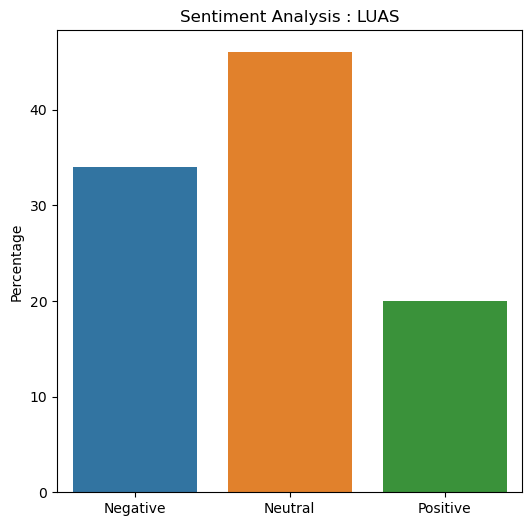

In [252]:
#Bar Graph. 
#In order to visualize the difference of positive, negative and neutral comments in the analysis and to see that the predominant one was the negative one. 
fig,ax=plt.subplots(figsize=(6,6))

counts=df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)

plt.title('Sentiment Analysis : LUAS')

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

<Figure size 600x600 with 0 Axes>

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Sentiment Analysis : LUAS')

Text(0, 0.5, '')

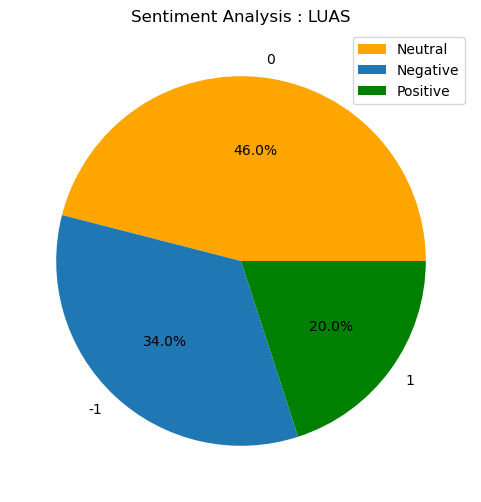

In [253]:
#Pie chart with normalized percentage of values
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'tab:blue', 'green'])
labels = {1: 'Positive', -1: 'Negative', 0: 'Neutral'}

plt.title('Sentiment Analysis : LUAS')

plt.ylabel('')
plt.legend(labels=[labels[i] for i in counts.index], loc='upper right')
plt.show()

# Word frequency

Plot the word cloud for all the key words without prepocessing it 

In [254]:
all_headlines = ' '.join(headlines)

In [255]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [256]:
from wordcloud import WordCloud 

In [257]:
wordcloud = WordCloud(random_state=21, max_font_size=119).generate(all_headlines)

<Figure size 1900x1000 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

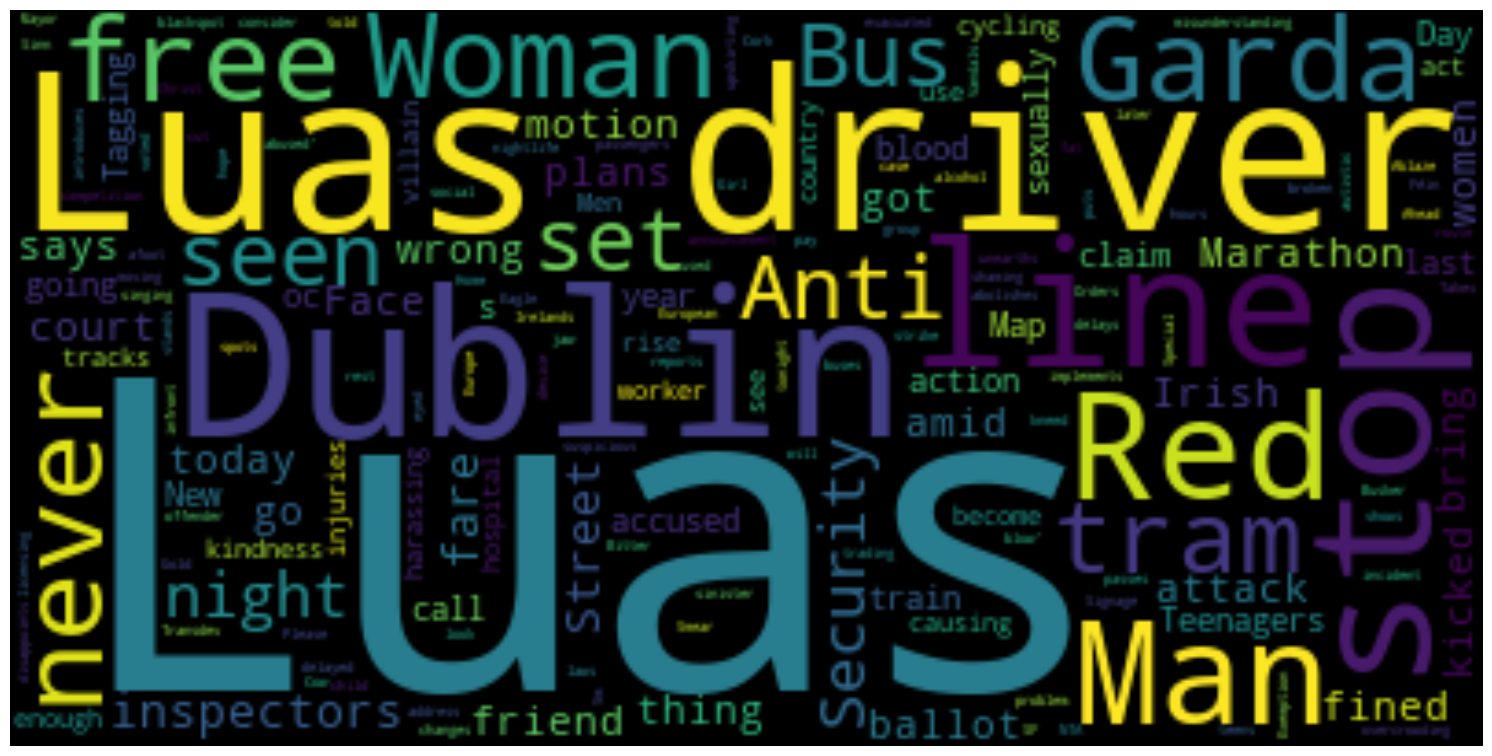

In [258]:
plt.figure(figsize=(19, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Reinforcement Learning

In [259]:
df2

headlines  label
0       Have you seen an act of kindness on the Luas?      1
1   Luas tracks causing rise in cycling injuries, ...      0
2   When you bring your friend up from the country...      1
3          Men harassing women at luas stop in Dublin     -1
4   Luas Red line...use enough and see yourself be...     -1
..                                                ...    ...
95  Anti-Corruption garda returns medal after bein...      1
96  Are there any new Metrolink or Luas lines in p...      0
97  Man who sexually assaulted woman on Luas tram ...     -1
98              Biden is blocking my luas omw to work     -1
99  Luas reduced timetable on St. Patrick’s Day sl...      0

[100 rows x 2 columns]

# NORWAY-Sentiment Analysis 

In [266]:
subreddit = reddit.subreddit("norway")
from datetime import datetime as dt

Lists to store post titles, comments, and timestamps

In [267]:
postTitles = []
postComments = []
commentTimes = []

In [268]:
for post in subreddit.search('T-bane', limit=10):
    post.comment_sort = 'best'  # Ordenar comentarios por 'best' para obtener los mejores comentarios primero
    post.comment_limit = None   # Sin límite en la cantidad de comentarios

    for comment in post.comments:
        if isinstance(comment, praw.models.MoreComments):
            continue  # Saltar comentarios adicionales no cargados completamente

        postTitles.append(post.title)
        postComments.append(comment.body)
        commentTimes.append(dt.fromtimestamp(comment.created_utc))

In [269]:
postsDict = {}
for post in subreddit.new(limit=10):
    postsDict[post.title] = []
    for comment in list(post.comments):
        postsDict[post.title].append({
            "comment":comment.body,
            "time": str(dt.fromtimestamp(comment.created_utc))
        })

# Importing information in json format

In [270]:
import json

In [271]:
postsDict

{'Ways to transfer money': [{'comment': 'If he has a paypal account it will work just fine.',
   'time': '2024-01-08 13:53:14'}],
 'Sad Alternative/Pop Norwegian Songs Recommendations?': [{'comment': 'Jokke - Bestevenner',
   'time': '2024-01-08 13:32:00'},
  {'comment': 'How about Highasakite, perhaps? \n\nOr if you prefer Norwegian lyrics, you could try something by Kaizers Orchestra. Many of their songs have somewhat melancholic lyrics, even if the overall sound of the song might come across as more happy sounding.',
   'time': '2024-01-08 13:07:29'},
  {'comment': 'Du fortenar ein som meg av Daniel Kvammen',
   'time': '2024-01-08 13:45:23'},
  {'comment': 'Teller Jan Eggum, er det mye å ta av. Du mener norskspråkelige antar jeg?',
   'time': '2024-01-08 13:54:54'},
  {'comment': 'Sidsel & Bugge, Okay, You Might Say',
   'time': '2024-01-08 13:57:54'}],
 'Oslo Torshov': [],
 'Wage Question': [{'comment': 'I don\'t understand most of your post, but the average full-time wage in Norw

In [272]:
data = json.dumps(postsDict)

In [273]:
with open("reddit data NWDF.json", "w") as f:
    f.write(data)

9662

In [274]:
NWDF=pd.DataFrame({
    "Post Title":postTitles,
    "Comment": postComments,
    "Comment Time": commentTimes
})

In [275]:
NWDF.head()

Post Title                                            Comment  \
0  Abou the T-bane  I find the T-bane door openers to be quite goo...   
1  Abou the T-bane  Former driver here: the button indicates that ...   
2  Abou the T-bane  I never understood this. The doors are program...   
3  Abou the T-bane  Oh, people misunderstand this every day. I lik...   
4  Abou the T-bane                       Just rip it open like a man.   

         Comment Time  
0 2023-01-16 16:36:05  
1 2023-01-17 04:34:55  
2 2023-01-16 14:36:41  
3 2023-01-16 19:12:25  
4 2023-01-16 13:21:17

# Saving data in .csv format

In [276]:
NWDF.to_csv('reddit_T-bane.cvs',index=False)

In [277]:
NWDF2= pd.read_csv('reddit_T-bane.cvs')

In [278]:
NWDF2 = NWDF2.drop_duplicates()

In [279]:
sentiment_scores = NWDF2['Comment'].apply(lambda x: sia.polarity_scores(x))

# DataFrame with the results of the sentiment analysis
sentiment_df = pd.DataFrame(list(sentiment_scores))
sentiment_df['Comment'] = NWDF2['Comment']

sentiment_df.head()

neg    neu    pos  compound  \
0  0.084  0.799  0.117    0.6053   
1  0.083  0.864  0.052   -0.2617   
2  0.129  0.871  0.000   -0.7096   
3  0.075  0.858  0.067   -0.2023   
4  0.000  0.667  0.333    0.3612   

                                             Comment  
0  I find the T-bane door openers to be quite goo...  
1  Former driver here: the button indicates that ...  
2  I never understood this. The doors are program...  
3  Oh, people misunderstand this every day. I lik...  
4                       Just rip it open like a man.

In [280]:
sentiment_df['label']=0
sentiment_df.loc[df['compound']>0.2,'label']=1
sentiment_df.loc[df['compound']<-0.2,'label']=-1
sentiment_df.head()

neg    neu    pos  compound  \
0  0.084  0.799  0.117    0.6053   
1  0.083  0.864  0.052   -0.2617   
2  0.129  0.871  0.000   -0.7096   
3  0.075  0.858  0.067   -0.2023   
4  0.000  0.667  0.333    0.3612   

                                             Comment  label  
0  I find the T-bane door openers to be quite goo...      1  
1  Former driver here: the button indicates that ...      0  
2  I never understood this. The doors are program...      1  
3  Oh, people misunderstand this every day. I lik...     -1  
4                       Just rip it open like a man.     -1

In [281]:
sentiment_NW= sentiment_df[['Comment','label']]
sentiment_NW.to_csv('sentiment_NW.cvs', mode='a',encoding='utf-8',index=False)

# Text Analytics & NLP

In [282]:
#cheking rows and confirm that there are no missing values.

In [283]:
sentiment_NW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  55 non-null     object
 1   label    55 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1012.0+ bytes


In [284]:
#Check for duplicate rows in the dataset.

In [285]:
sentiment_NW.groupby('label').describe()

Comment                                                               
        count unique                                                top freq
label                                                                       
-1         22     22  Oh, people misunderstand this every day. I lik...    1
 0         21     20                                          [deleted]    2
 1         12     12  I find the T-bane door openers to be quite goo...    1

In [286]:
sentiment_NW = sentiment_NW.drop_duplicates()
sentiment_NW.groupby('label').describe()

Comment                                                               
        count unique                                                top freq
label                                                                       
-1         22     22  Oh, people misunderstand this every day. I lik...    1
 0         20     20  Former driver here: the button indicates that ...    1
 1         12     12  I find the T-bane door openers to be quite goo...    1

In [287]:
#min_df by 5 to ignore words that appear less than 5 times in the training text corpus. It reduces the likelihood of memory errors and will probably also make the model more accurate. 

In [288]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5)
x = vectorizer.fit_transform(sentiment_NW['Comment'])
y = sentiment_NW['label']

In [289]:
#text is vectorized 

In [290]:
text = vectorizer.transform(['I find the T-bane door openers to be quite good'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['bane'], dtype='<U9')]


In [291]:
#Split the dataset for training and testing.

In [292]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

# Train a logistic-regression model

In [293]:
#Train a classifier.
#fit a model to the data.

In [294]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [295]:
#Validation of the trained model with 50% of the data set reserved for testing and show a confusion matrix.

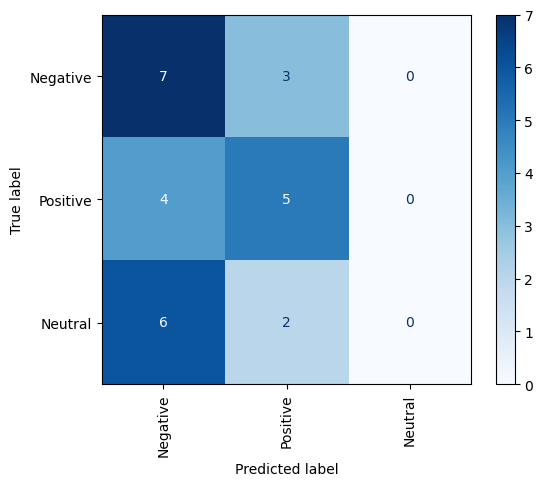

In [296]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative', 'Positive','Neutral'],
                   cmap='Blues', xticks_rotation='vertical')

The model correctly identified 11 negative reviews while misclassifying 0 of them. It correctly identified 9 positive reviews and got it wrong 0 times.

# Using the model to analyze text

In [297]:
review = "Transport in Oslo is very slow and expensive"
model.predict_proba(vectorizer.transform([review]))[0][1]

0.3503036003324878